# BASE ALTO RIESGO-CRM

In [ ]:
# Importar librerias para la preparación y visualización de los datos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import seaborn as sns
import missingno as msno
from sklearn.impute import KNNImputer

In [ ]:
url="https://raw.githubusercontent.com/Brayanrys/ENTREVISTA/main/ALTO%20RIESGO.csv"
data=pd.read_csv(url,sep=";")
data = data.replace(',', '.', regex=True)
data = data.replace('%', '', regex=True)
data = data.replace('Pagaré', '24', regex=True)
data = data.replace('Congarantías', '24', regex=True)
#data = data.replace('\.', '', regex=True)
data = data.replace(' -   ', '0', regex=True)
data = data.replace('riesgo bajo', 'Riesgo Bajo', regex=True)
data = data.replace('riesgo medio', 'Riesgo Medio', regex=True)
data['PIVOT'] = 'NEGADOS'
data

ID Departamento Tasa_desocupación_Junio_agosto2023     Región  \
0         919580   Bogotá D.C                               9.20  Bogota.DC   
1       52153270   Bogotá D.C                               9.20  Bogota.DC   
2         849717   Bogotá D.C                               9.20  Bogota.DC   
3       59164264       Caldas                               9.00     Andina   
4       59164562   Bogotá D.C                               9.20  Bogota.DC   
...          ...          ...                                ...        ...   
3182  1117548332        CAUCA                               8.90     Andina   
3183    38363555        CAUCA                               8.90     Andina   
3184    10261423      Caquetá                              13.40   Amazonia   
3185    12911721      QUINDIO                              12.90     Andina   
3186    71791139        HUILA                              13.30     Andina   

      FormaPago  MontoSolicitado    Cuota TasaSeguro TasaEfectivaAnual  \
0          Caja         88000000  2631078       0.12             34.49   
1     Nomina 50         75000000  1765213       0.15             26.08   
2          Caja         20000000   660056       0.12             33.31   
3          Caja         20000000   799328      0.648             36.91   
4          Caja         13000000   519563      0.648             36.91   
...         ...              ...      ...        ...               ...   
3182  Nomina 50          6989327    20.27       18.6              1.55   
3183  Nomina 50          5897275    20.27       18.6              1.55   
3184  Nomina 50          8418783    29.76      26.34              2.19   
3185  Nomina 50          6833996    30.59      26.99              2.25   
3186  Nomina 50          4381854    30.59      26.99              2.25   

     TasaNominalAnual  ...       Tipo_Contrato Tipo_de_vivienda Tipo_persona  \
0                  30  ...     Sin información  Sin Información      Natural   
1                23.4  ...          En carrera         Familiar      Natural   
2                29.1  ...     Sin información  Sin Información      Natural   
3               31.83  ...     Sin información  Sin Información      Natural   
4               31.83  ...     Sin información  Sin Información      Natural   
...               ...  ...                 ...              ...          ...   
3182             32.5  ...     Sin información           Propia      Natural   
3183             32.5  ...  Término indefinido           Propia      Natural   
3184               60  ...     Sin información           Propia      Natural   
3185               60  ...  Término indefinido        Arrendada      Natural   
3186               60  ...     Sin información         Familiar      Natural   

                             NICHO SECTOR_EMPLEO Indicador_carga_1222  \
0                     OTROS NICHOS   OTRO_SECTOR                 1.21   
1     Sistema Nacional de Justicia       PÚBLICO          1.110078535   
2                     OTROS NICHOS   OTRO_SECTOR                 1.21   
3                     OTROS NICHOS   OTRO_SECTOR                 1.21   
4                     OTROS NICHOS   OTRO_SECTOR                 1.21   
...                            ...           ...                  ...   
3182            Otros Segmentos **       PÚBLICO                 1.21   
3183  Sistema Nacional de Justicia       PÚBLICO          1.995660075   
3184  Sistema Nacional de Justicia       PÚBLICO          1.521672332   
3185  Sistema Nacional de Justicia       PÚBLICO                 1.21   
3186  Sistema Nacional de Justicia       PÚBLICO          0.438410305   

     ASOCIADO % Part.       RIESGO    PIVOT  
0          No   48.13  Riesgo Alto  NEGADOS  
1          Si   30.64  Riesgo Alto  NEGADOS  
2          No   48.13  Riesgo Alto  NEGADOS  
3          No   48.13  Riesgo Alto  NEGADOS  
4          No   48.13  Riesgo Alto  NEGADOS  
...       ...     ...          ...      ...  
3182       Si   

## Exploración de datos

## Vamos a ver cuántas filas y columnas tiene nuestro conjunto de datos

In [ ]:
url="https://raw.githubusercontent.com/Brayanrys/ENTREVISTA/main/APROBADOS.csv"
data2=pd.read_csv(url,sep=";")
data2_sin_nan = data2.dropna()
data2 = data2.replace(',', '.', regex=True)
data2 = data2.replace('%', '', regex=True)
data2 = data2.replace(' -   ', '0', regex=True)
data2['PIVOT'] = 'APROBADOS'
data2

ID      Activos  Años de permanencia  Area_y/o_Empresa  \
0      13500045   10000000.0                    0               NaN   
1      42496957  500000000.0                    0     RAMA JUDICIAL   
2    1100952347   40000000.0                    0  FISCALIA GENERAL   
3      41558186   18000000.0                    0     RAMA JUDICIAL   
4      92503876  110000000.0                    0     RAMA JUDICIAL   
..          ...          ...                  ...               ...   
469     6525236    2903415.0                    6                 0   
470    41550832    5529441.0                    0        PENSIONADA   
471    11317361   40000000.0                    0     RAMA JUDICIAL   
472    23554215  800000000.0                    0     RAMA JUDICIAL   
473    63325263    5000000.0                    0     RAMA JUDICIAL   

     Canon de arrendamiento Cargo_actual_o_ocupación Cargo_Clasificado  \
0                         0                        0           CITADOR   
1                         0                     Juez    PENSIONADO (A)   
2                         0                        0       ABOGADO (A)   
3                    420000            Secretario(A)    SECRETARIO (A)   
4                         0              Escribiente       ESCRIBIENTE   
..                      ...                      ...               ...   
469                       0                        0           CITADOR   
470                       0            Secretario(A)    PENSIONADO (A)   
471                       0                        0           OFICIAL   
472                       0                        0              JUEZ   
473                       0                Asistente         ASISTENTE   

     Centro Educativo        Departamento     Región  ...  PEPS  \
0                   0  NORTE DE SANTANDER     Andina  ...    No   
1                   0               CESAR     Caribe  ...    Si   
2                   0           SANTANDER     Andina  ...    No   
3                   0              TOLIMA     Andina  ...    No   
4                   0               SUCRE     Caribe  ...    No   
..                ...                 ...        ...  ...   ...   
469                 0     VALLE DEL CAUCA   Pacífico  ...    No   
470                 0         BOGOTÁ D.C.  Bogota.DC  ...    No   
471                 0                META  Orinoquia  ...    No   
472                 0              BOYACÁ     Andina  ...    No   
473                 0           SANTANDER     Andina  ...    No   

    Personas_a_cargo      Profesión_Clasificada     Salario_Pensión  \
0                  1                    ABOGADO  Menor a 4 millones   
1                  0                    DERECHO      4 a 7 millones   
2                  0                    DERECHO      4 a 7 millones   
3                  1                    ABOGADO      4 a 7 millones   
4                  4                 ECONOMISTA  Menor a 4 millones   
..               ...                        ...                 ...   
469                3                    ABOGADO  Menor a 4 millones   
470                1                 SECRETARIA      4 a 7 millones   
471                1  ADMINISTRADOR DE EMPRESAS      4 a 7 millones   
472                1                    ABOGADO     7 a 15 millones   
473                1          TRABAJADOR SOCIAL      4 a 7 millones   

     Segmento_Actual ASOCIADO        RIESGO  CAPITALenMORA MontoSolicitado  \
0            Clasico       Si   Riesgo Bajo              0        29467809   
1         Preferente       Si  Riesgo Medio        3869399        65322331   
2            Clasico       Si   Riesgo Bajo         136695        26192442   
3         Preferente       Si   Riesgo Alto              0        40323665   
4            Premium       Si   Riesgo Bajo              0        45612134   
..               ...      ...           ...            ...             ...   
469       Preferente       Si   Riesgo Bajo              0        7

In [ ]:
# COncatenacion de las dos fuentes de datos
data = pd.concat([data,data2],ignore_index=True)
data

ID     Departamento Tasa_desocupación_Junio_agosto2023     Región  \
0       919580       Bogotá D.C                               9.20  Bogota.DC   
1     52153270       Bogotá D.C                               9.20  Bogota.DC   
2       849717       Bogotá D.C                               9.20  Bogota.DC   
3     59164264           Caldas                               9.00     Andina   
4     59164562       Bogotá D.C                               9.20  Bogota.DC   
...        ...              ...                                ...        ...   
3656   6525236  VALLE DEL CAUCA                                NaN   Pacífico   
3657  41550832      BOGOTÁ D.C.                                NaN  Bogota.DC   
3658  11317361             META                                NaN  Orinoquia   
3659  23554215           BOYACÁ                                NaN     Andina   
3660  63325263        SANTANDER                                NaN     Andina   

      FormaPago  MontoSolicitado    Cuota TasaSeguro TasaEfectivaAnual  \
0          Caja         88000000  2631078       0.12             34.49   
1     Nomina 50         75000000  1765213       0.15             26.08   
2          Caja         20000000   660056       0.12             33.31   
3          Caja         20000000   799328      0.648             36.91   
4          Caja         13000000   519563      0.648             36.91   
...         ...              ...      ...        ...               ...   
3656        NaN         77205293      NaN        NaN               NaN   
3657        NaN         13707935      NaN        NaN               NaN   
3658        NaN         71240662      NaN        NaN               NaN   
3659        NaN         77951257      NaN        NaN               NaN   
3660        NaN         68123874      NaN        NaN               NaN   

     TasaNominalAnual  ...       RIESGO      PIVOT Años de permanencia  \
0                  30  ...  Riesgo Alto    NEGADOS                 NaN   
1                23.4  ...  Riesgo Alto    NEGADOS                 NaN   
2                29.1  ...  Riesgo Alto    NEGADOS                 NaN   
3               31.83  ...  Riesgo Alto    NEGADOS                 NaN   
4               31.83  ...  Riesgo Alto    NEGADOS                 NaN   
...               ...  ...          ...        ...                 ...   
3656              NaN  ...  Riesgo Bajo  APROBADOS                 6.0   
3657              NaN  ...  Riesgo Bajo  APROBADOS                 0.0   
3658              NaN  ...  Riesgo Bajo  APROBADOS                 0.0   
3659              NaN  ...  Riesgo Bajo  APROBADOS                 0.0   
3660              NaN  ...  Riesgo Bajo  APROBADOS                 0.0   

     Canon de arrendamiento Centro Educativo En listas restrictivas  \
0                       NaN              NaN                    NaN   
1                       NaN              NaN                    NaN   
2                       NaN              NaN                    NaN   
3                       NaN              NaN                    NaN   
4                       NaN              NaN                    NaN   
...                     ...              ...                    ...   
3656                    0.0              0.0                     No   
3657                    0.0              0.0                     No   
3658                    0.0              0.0                     No   
3659                    0.0              0.0                     No   
3660                    0.0              0.0                     No   

     Es codeudor Fecha vinculación al grupo   Lugar de nacimiento  \
0            NaN                        NaN                   NaN   
1            NaN                        NaN                   NaN   
2            NaN                        NaN                   NaN   
3            NaN                        NaN                   NaN   
4            NaN                        NaN                   N

In [ ]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3661 entries, 0 to 3660
Data columns (total 61 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  3661 non-null   int64  
 1   Departamento                        3661 non-null   object 
 2   Tasa_desocupación_Junio_agosto2023  3187 non-null   object 
 3   Región                              3661 non-null   object 
 4   FormaPago                           3187 non-null   object 
 5   MontoSolicitado                     3661 non-null   int64  
 6   Cuota                               3187 non-null   object 
 7   TasaSeguro                          3187 non-null   object 
 8   TasaEfectivaAnual                   3187 non-null   object 
 9   TasaNominalAnual                    3187 non-null   object 
 10  TasaPeriodica                       3187 non-null   object 
 11  Plazo                               3187 no

# Transformación de variables

In [ ]:
# Desactivar advertencias
data['MontoSolicitado'] = data['MontoSolicitado'].astype('float64')
data['Cuota'] = data['Cuota'].astype('float64')
data['Cuota'] = data['Cuota'].astype('float64')
data['Tasa_desocupación_Junio_agosto2023'] = data['Tasa_desocupación_Junio_agosto2023'].astype('float64')
data['TasaSeguro'] = data['TasaSeguro'].astype('float64')
data['TasaEfectivaAnual'] = data['TasaEfectivaAnual'].astype('float64')
data['TasaNominalAnual'] = data['TasaNominalAnual'].astype('float64')
data['TasaPeriodica'] = data['TasaPeriodica'].astype('float64')
data['Plazo'] = data['Plazo'].astype('float64')
data['Activos'] = data['Activos'].astype('float64')
data['Edad_a_la_fecha'] = data['Edad_a_la_fecha'].astype('float64')
data['Estrato'] = data['Estrato'].astype('float64')
data['Gasto_mensual_totaL'] = data['Gasto_mensual_totaL'].astype('float64')
data['Gastos_Familiares'] = data['Gastos_Familiares'].astype('float64')
data['Gastos_Obligatorios'] = data['Gastos_Obligatorios'].astype('float64')
data['Ingresos_anuales'] = data['Ingresos_anuales'].astype('float64')
data['Ingresos_Financieros'] = data['Ingresos_Financieros'].astype('float64')
data['Ingresos_Honorarios'] = data['Ingresos_Honorarios'].astype('float64')
data['Nº_de_hijos'] = data['Nº_de_hijos'].astype('float64')
data['Pasivos'] = data['Pasivos'].astype('float64')
data['Patrimonio'] = data['Patrimonio'].astype('float64')
data['Personas_a_cargo'] = data['Personas_a_cargo'].astype('float64')
#data['Salario_Pensión'] = data['Salario_Pensión'].astype('float64')
data['% Part.'] = data['% Part.'].astype('float64')
data['Indicador_carga_1222'] = data['Indicador_carga_1222'].astype('float64')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3661 entries, 0 to 3660
Data columns (total 61 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  3661 non-null   int64  
 1   Departamento                        3661 non-null   object 
 2   Tasa_desocupación_Junio_agosto2023  3187 non-null   float64
 3   Región                              3661 non-null   object 
 4   FormaPago                           3187 non-null   object 
 5   MontoSolicitado                     3661 non-null   float64
 6   Cuota                               3187 non-null   float64
 7   TasaSeguro                          3187 non-null   float64
 8   TasaEfectivaAnual                   3187 non-null   float64
 9   TasaNominalAnual                    3187 non-null   float64
 10  TasaPeriodica                       3187 non-null   float64
 11  Plazo                               3187 no

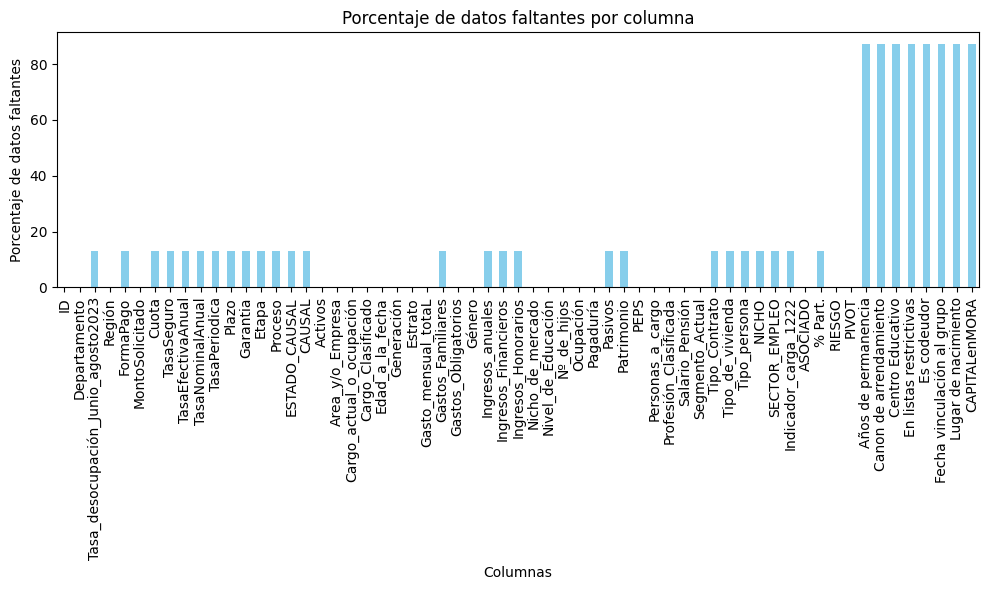

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Calcular el porcentaje de datos faltantes por columna
missing_data = data.isnull().mean() * 100

# Crear el gráfico
plt.figure(figsize=(10, 6))
missing_data.plot(kind='bar', color='skyblue')
plt.title('Porcentaje de datos faltantes por columna')
plt.xlabel('Columnas')
plt.ylabel('Porcentaje de datos faltantes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

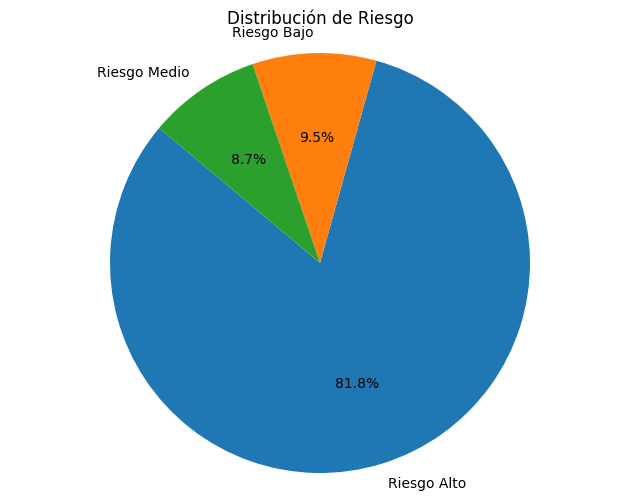

In [ ]:
# Calcular el conteo de cada categoría de la variable de riesgo
conteo_riesgo = data['RIESGO'].value_counts()

# Graficar el gráfico de pie
plt.figure(figsize=(8, 6))
plt.pie(conteo_riesgo, labels=conteo_riesgo.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Riesgo')
plt.axis('equal')  # Para asegurarse de que el gráfico de pie sea un círculo
plt.show()

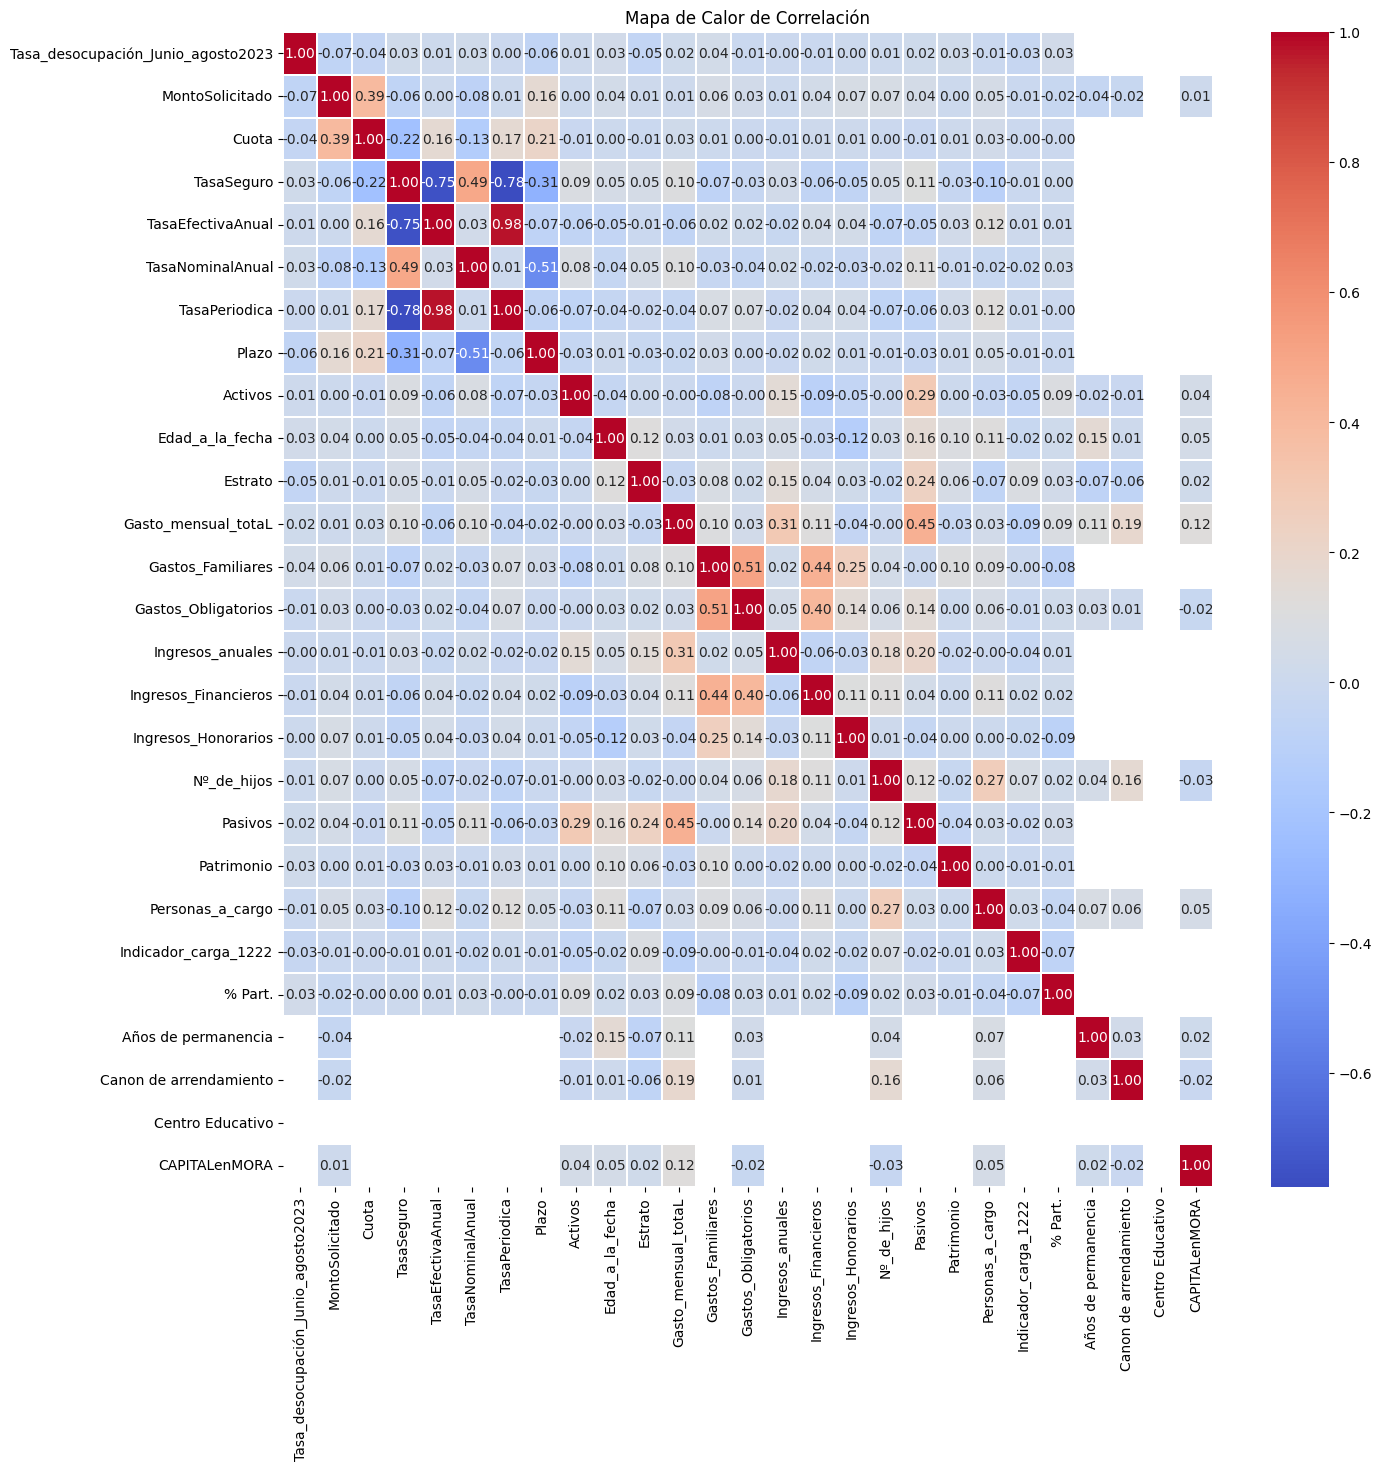

In [ ]:
df = data.select_dtypes(include= float)
df.describe()

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix,  cmap='coolwarm', linewidths=.1,fmt=".2f",annot=True)
plt.title('Mapa de Calor de Correlación')
plt.show()

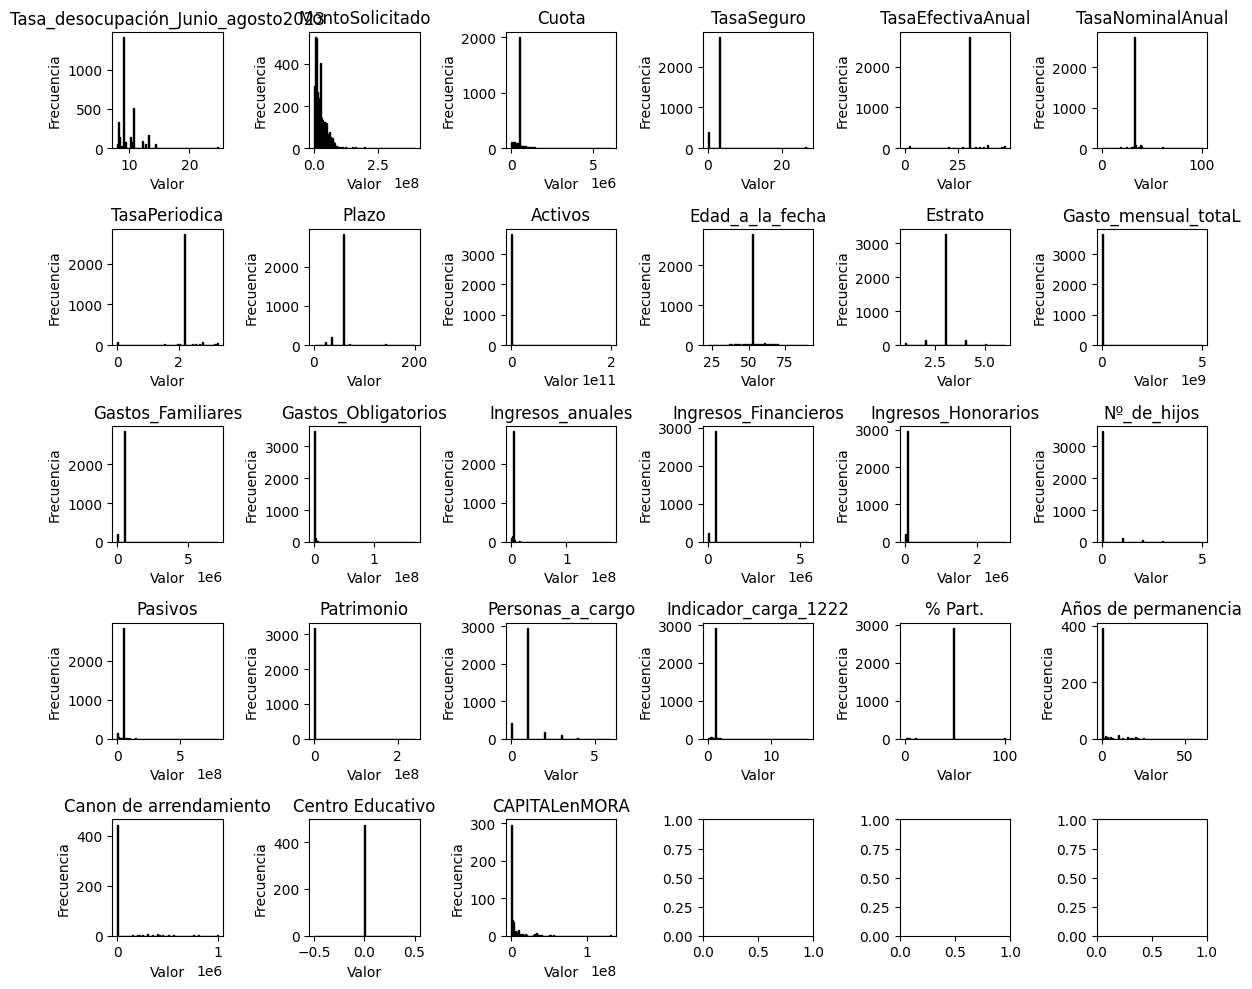

In [ ]:
numerical_columns = df.columns

# Ajustar la disposición de los subplots
fig, axs = plt.subplots(nrows=5, ncols=6, figsize=(12, 10))
axs = axs.ravel()
# Iterar sobre las columnas numéricas y dibujar histogramas
for i, col in enumerate(numerical_columns):
    axs[i].hist(df[col], bins=100, color='skyblue', edgecolor='black')
    axs[i].set_title(col)
    axs[i].set_xlabel('Valor')
    axs[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

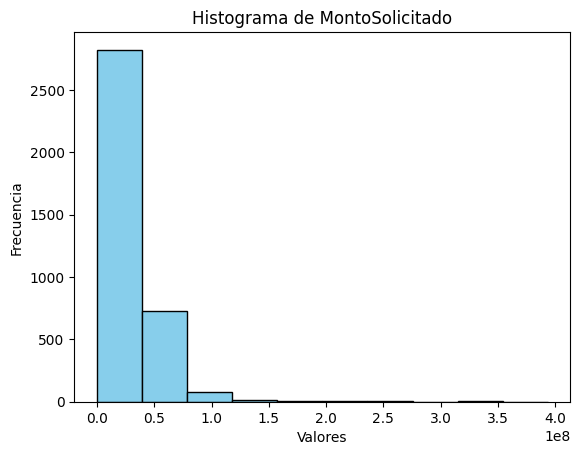

In [ ]:
# Seleccionar la columna específica del DataFrame
columna = 'MontoSolicitado'
data = df[columna]

# Crear el histograma
plt.hist(data, color='skyblue', edgecolor='black')

# Agregar título y etiquetas de los ejes
plt.title('Histograma de {}'.format(columna))
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

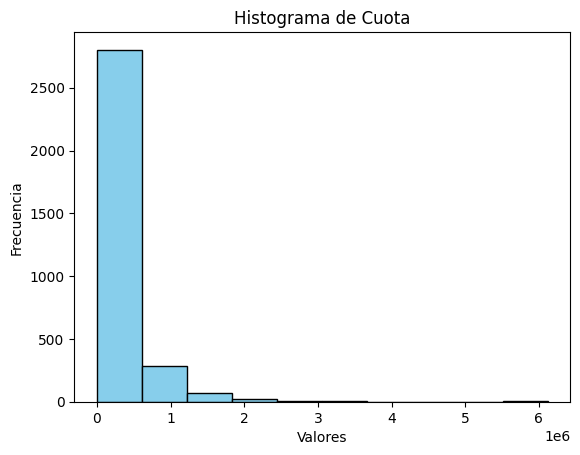

In [ ]:
# Seleccionar la columna específica del DataFrame
columna = 'Cuota'
data = df[columna]

# Crear el histograma
plt.hist(data, color='skyblue', edgecolor='black')

# Agregar título y etiquetas de los ejes
plt.title('Histograma de {}'.format(columna))
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

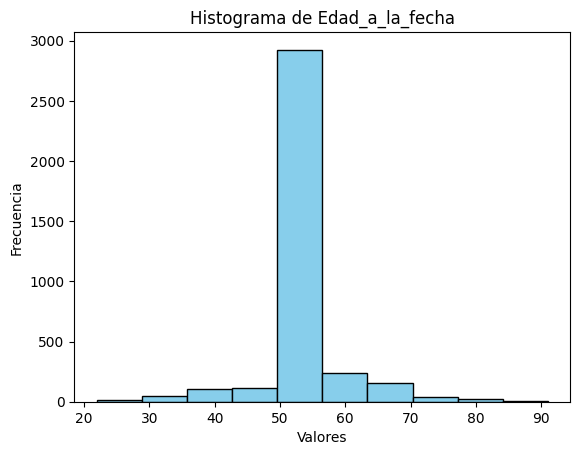

In [ ]:
# Seleccionar la columna específica del DataFrame
columna = 'Edad_a_la_fecha'
data = df[columna]

# Crear el histograma
plt.hist(data, color='skyblue', edgecolor='black')

# Agregar título y etiquetas de los ejes
plt.title('Histograma de {}'.format(columna))
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

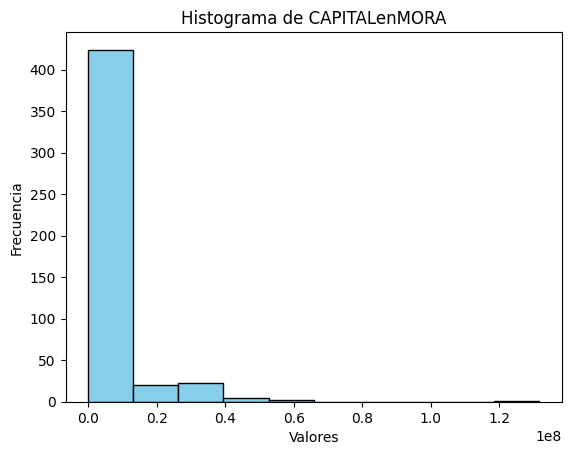

In [ ]:
# Seleccionar la columna específica del DataFrame
columna = 'CAPITALenMORA'
data = df[columna]

# Crear el histograma
plt.hist(data, color='skyblue', edgecolor='black')

# Agregar título y etiquetas de los ejes
plt.title('Histograma de {}'.format(columna))
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

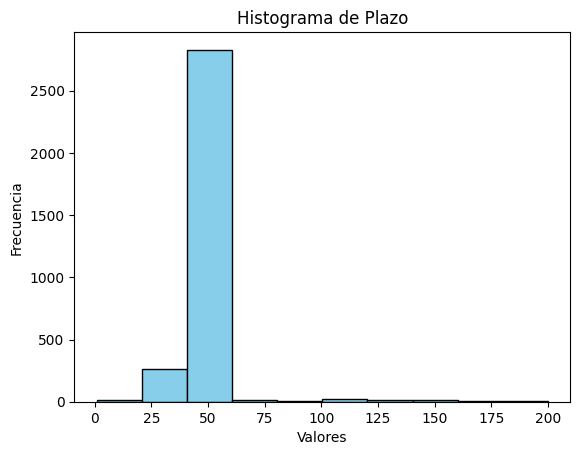

In [ ]:
# Seleccionar la columna específica del DataFrame
columna = 'Plazo'
data = df[columna]

# Crear el histograma
plt.hist(data, color='skyblue', edgecolor='black')

# Agregar título y etiquetas de los ejes
plt.title('Histograma de {}'.format(columna))
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

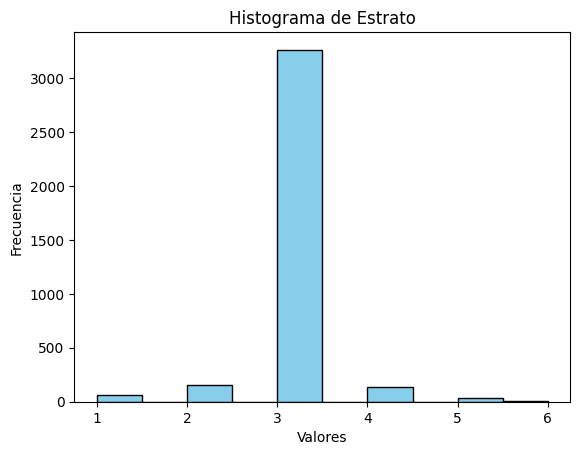

In [ ]:
# Seleccionar la columna específica del DataFrame
columna = 'Estrato'
data = df[columna]

# Crear el histograma
plt.hist(data, color='skyblue', edgecolor='black')

# Agregar título y etiquetas de los ejes
plt.title('Histograma de {}'.format(columna))
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

In [ ]:
# Eliminar múltiples variables
variables_a_eliminar = ['Cargo_Clasificado',
                        'Pagaduría',
                        'Profesión_Clasificada',
                        'Area_y/o_Empresa',
                        'Cargo_actual_o_ocupación',
                        'ESTADO_CAUSAL',
                        'Departamento',
                        'TasaNominalAnual',
                        'TasaPeriodica',
                        'Gastos_Familiares',
                        'Gastos_Obligatorios',
                        'Ingresos_Financieros',
                        'Ingresos_Honorarios',
                        'Pasivos','Patrimonio',
                        'Personas_a_cargo',
                        '% Part.',
                        'Tasa_desocupación_Junio_agosto2023',
                        'Fecha vinculación al grupo',
                        'Lugar de nacimiento',
                        'Años de permanencia',
                        'Canon de arrendamiento',
                        'Centro Educativo',
                        'CAPITALenMORA',
                        'Indicador_carga_1222']
data.drop(variables_a_eliminar, axis=1, inplace=True)
data

ID     Región  FormaPago  MontoSolicitado      Cuota  TasaSeguro  \
0       919580  Bogota.DC       Caja       88000000.0  2631078.0       0.120   
1     52153270  Bogota.DC  Nomina 50       75000000.0  1765213.0       0.150   
2       849717  Bogota.DC       Caja       20000000.0   660056.0       0.120   
3     59164264     Andina       Caja       20000000.0   799328.0       0.648   
4     59164562  Bogota.DC       Caja       13000000.0   519563.0       0.648   
...        ...        ...        ...              ...        ...         ...   
3656   6525236   Pacífico        NaN       77205293.0        NaN         NaN   
3657  41550832  Bogota.DC        NaN       13707935.0        NaN         NaN   
3658  11317361  Orinoquia        NaN       71240662.0        NaN         NaN   
3659  23554215     Andina        NaN       77951257.0        NaN         NaN   
3660  63325263     Andina        NaN       68123874.0        NaN         NaN   

      TasaEfectivaAnual  Plazo  Garantia    Etapa  ...    Tipo_Contrato  \
0                 34.49   96.0  Codeudor  Negados  ...  Sin información   
1                 26.08  132.0        24  Negados  ...       En carrera   
2                 33.31   60.0        24  Negados  ...  Sin información   
3                 36.91   60.0        24  Negados  ...  Sin información   
4                 36.91   60.0        24  Negados  ...  Sin información   
...                 ...    ...       ...      ...  ...              ...   
3656                NaN    NaN       NaN      NaN  ...              NaN   
3657                NaN    NaN       NaN      NaN  ...              NaN   
3658                NaN    NaN       NaN      NaN  ...              NaN   
3659                NaN    NaN       NaN      NaN  ...              NaN   
3660                NaN    NaN       NaN      NaN  ...              NaN   

     Tipo_de_vivienda  Tipo_persona                         NICHO  \
0     Sin Información       Natural                  OTROS NICHOS   
1            Familiar       Natural  Sistema Nacional de Justicia   
2     Sin Información       Natural                  OTROS NICHOS   
3     Sin Información       Natural                  OTROS NICHOS   
4     Sin Información       Natural                  OTROS NICHOS   
...               ...           ...                           ...   
3656              NaN           NaN                           NaN   
3657              NaN           NaN                           NaN   
3658              NaN           NaN                           NaN   
3659              NaN           NaN                           NaN   
3660              NaN           NaN                           NaN   

     SECTOR_EMPLEO  ASOCIADO       RIESGO      PIVOT  En listas restrictivas  \
0      OTRO_SECTOR        No  Riesgo Alto    NEGADOS                     NaN   
1          PÚBLICO        Si  Riesgo Alto    NEGADOS                     NaN   
2      OTRO_SECTOR        No  Riesgo Alto    NEGADOS                     NaN   
3      OTRO_SECTOR        No  Riesgo Alto    NEGADOS                     NaN   
4      OTRO_SECTOR        No  Riesgo Alto    NEGADOS                     NaN   
...            ...       ...          ...        ...                     ...   
3656           NaN        Si  Riesgo Bajo  APROBADOS                      No   
3657           NaN        Si  Riesgo Bajo  APROBADOS                      No   
3658           NaN        Si  Riesgo Bajo  APROBADOS                      No   
3659           NaN        Si  Riesgo Bajo  APROBADOS                      No   
3660           NaN        Si  Riesgo Bajo  APROBADOS                      No   

     Es codeudor  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
3656          No  
3657          No  
3658          No  
3659          No  
3660          No  

[3661 rows x 36 columns]

In [ ]:
df4 = data.select_dtypes(include= object)
df4

Región  FormaPago  Garantia    Etapa     Proceso  \
0     Bogota.DC       Caja  Codeudor  Negados  PRESENCIAL   
1     Bogota.DC  Nomina 50        24  Negados     DIGITAL   
2     Bogota.DC       Caja        24  Negados     DIGITAL   
3        Andina       Caja        24  Negados     DIGITAL   
4     Bogota.DC       Caja        24  Negados     DIGITAL   
...         ...        ...       ...      ...         ...   
3656   Pacífico        NaN       NaN      NaN         NaN   
3657  Bogota.DC        NaN       NaN      NaN         NaN   
3658  Orinoquia        NaN       NaN      NaN         NaN   
3659     Andina        NaN       NaN      NaN         NaN   
3660     Andina        NaN       NaN      NaN         NaN   

                                               CAUSAL    Generación  \
0     Solicitudes rechazadas por flujo de caja deudor             X   
1     Solicitudes rechazadas por flujo de caja deudor  Baby Boomers   
2     Solicitudes rechazadas por flujo de caja deudor             X   
3     Solicitudes rechazadas por flujo de caja deudor             X   
4     Solicitudes rechazadas por flujo de caja deudor             X   
...                                               ...           ...   
3656                                              NaN             X   
3657                                              NaN  Baby Boomers   
3658                                              NaN             X   
3659                                              NaN  Baby Boomers   
3660                                              NaN             X   

         Género              Nicho_de_mercado Nivel_de_Educación  ...  \
0            NR                  Otros Nichos            Ninguno  ...   
1      Femenino                  Otros Nichos    Especialización  ...   
2            NR                  Otros Nichos            Ninguno  ...   
3            NR                  Otros Nichos            Ninguno  ...   
4            NR                  Otros Nichos            Ninguno  ...   
...         ...                           ...                ...  ...   
3656  Masculino                 Rama Judicial      Universitario  ...   
3657   Femenino                  Colpensiones         Secundaria  ...   
3658  Masculino                 Rama Judicial      Universitario  ...   
3659   Femenino  SISTEMA NACIONAL DE JUSTICIA    Especialización  ...   
3660   Femenino  SISTEMA NACIONAL DE JUSTICIA      Universitario  ...   

        Tipo_Contrato Tipo_de_vivienda Tipo_persona  \
0     Sin información  Sin Información      Natural   
1          En carrera         Familiar      Natural   
2     Sin información  Sin Información      Natural   
3     Sin información  Sin Información      Natural   
4     Sin información  Sin Información      Natural   
...               ...              ...          ...   
3656              NaN              NaN          NaN   
3657              NaN              NaN          NaN   
3658              NaN              NaN          NaN   
3659              NaN              NaN          NaN   
3660              NaN              NaN          NaN   

                             NICHO SECTOR_EMPLEO ASOCIADO       RIESGO  \
0                     OTROS NICHOS   OTRO_SECTOR       No  Riesgo Alto   
1     Sistema Nacional de Justicia       PÚBLICO       Si  Riesgo Alto   
2                     OTROS NICHOS   OTRO_SECTOR       No  Riesgo Alto   
3                     OTROS NICHOS   OTRO_SECTOR       No  Riesgo Alto   
4                     OTROS NICHOS   OTRO_SECTOR       No  Riesgo Alto   
...                            ...           ...      ...          ...   
3656                           NaN           NaN       Si  Riesgo Bajo   
3657                           NaN           NaN       Si  Riesgo Bajo   
3658                           NaN           NaN       Si  Riesgo Bajo   
3659                           NaN           NaN       Si  Riesgo Bajo   
3660                           NaN           NaN       Si  Riesgo Bajo 

In [ ]:
df3 = data.select_dtypes(include= float)

imputador_knn = KNNImputer(n_neighbors=5)
data_imp = pd.DataFrame(imputador_knn.fit_transform(df3), columns=df3.columns, index=df3.index)
data_imp

MontoSolicitado       Cuota  TasaSeguro  TasaEfectivaAnual  Plazo  \
0          88000000.0  2631078.00      0.1200             34.490   96.0   
1          75000000.0  1765213.00      0.1500             26.080  132.0   
2          20000000.0   660056.00      0.1200             33.310   60.0   
3          20000000.0   799328.00      0.6480             36.910   60.0   
4          13000000.0   519563.00      0.6480             36.910   60.0   
...               ...         ...         ...                ...    ...   
3656       77205293.0  1083568.20      1.9856             27.798   87.4   
3657       13707935.0   423183.20      0.6730             23.660   57.4   
3658       71240662.0   857823.00      1.9300             25.530   71.4   
3659       77951257.0   293212.34      5.5840             18.002   40.4   
3660       68123874.0  1037736.60      2.5936             29.846   71.2   

          Activos  Edad_a_la_fecha  Estrato  Gasto_mensual_totaL  \
0     119673936.0             53.0      3.0            1976755.0   
1     100000000.0             70.0      3.0            2542000.0   
2     119673936.0             53.0      3.0            1976755.0   
3     119673936.0             53.0      3.0            1976755.0   
4     119673936.0             53.0      3.0            1976755.0   
...           ...              ...      ...                  ...   
3656    2903415.0             55.0      3.0            1820929.0   
3657    5529441.0             71.0      3.0            1358001.0   
3658   40000000.0             53.0      3.0            1500000.0   
3659  800000000.0             63.0      5.0            3000000.0   
3660    5000000.0             57.0      3.0              10000.0   

      Ingresos_anuales  Nº_de_hijos  
0            4775305.0          0.0  
1            5082586.0          0.0  
2            4775305.0          0.0  
3            4775305.0          0.0  
4            4775305.0          0.0  
...                ...          ...  
3656         2845414.4          2.0  
3657         2947057.4          0.0  
3658         4944170.0          0.0  
3659        11917343.6          0.0  
3660         2006999.0          0.0  

[3661 rows x 11 columns]

In [ ]:
df3.describe()

MontoSolicitado         Cuota   TasaSeguro  TasaEfectivaAnual  \
count     3.661000e+03  3.661000e+03  3661.000000        3661.000000   
mean      2.671251e+07  5.395718e+05     3.307783          29.990556   
std       2.761098e+07  3.354012e+05     3.138162           5.939735   
min       0.000000e+00  0.000000e+00     0.000000           0.000000   
25%       8.716324e+06  5.085660e+05     3.160000          30.510000   
50%       2.000000e+07  5.360930e+05     3.160000          30.510000   
75%       3.719735e+07  5.360930e+05     3.160000          30.510000   
max       3.935794e+08  6.121800e+06    26.990000          47.080000   

             Plazo       Activos  Edad_a_la_fecha      Estrato  \
count  3661.000000  3.661000e+03      3661.000000  3661.000000   
mean     58.387271  1.754555e+08        53.443595     2.990986   
std      14.285640  3.304925e+09         6.077001     0.457094   
min       1.000000  0.000000e+00        22.000000     1.000000   
25%      59.000000  1.196739e+08        53.000000     3.000000   
50%      59.000000  1.196739e+08        53.000000     3.000000   
75%      59.000000  1.196739e+08        53.000000     3.000000   
max     200.000000  2.000000e+11        91.000000     6.000000   

       Gasto_mensual_totaL  Ingresos_anuales  Nº_de_hijos  
count         3.661000e+03      3.661000e+03  3661.000000  
mean          3.494290e+06      4.766342e+06     0.075936  
std           8.261914e+07      3.493935e+06     0.371414  
min           0.000000e+00      0.000000e+00     0.000000  
25%           1.976755e+06      4.775305e+06     0.000000  
50%           1.976755e+06      4.775305e+06     0.000000  
75%           1.976755e+06      4.775305e+06     0.000000  
max           5.000000e+09      1.810606e+08     5.000000

In [ ]:
data_imp1 = pd.concat([data_imp,df4],axis=1)
data_imp1

MontoSolicitado       Cuota  TasaSeguro  TasaEfectivaAnual  Plazo  \
0          88000000.0  2631078.00      0.1200             34.490   96.0   
1          75000000.0  1765213.00      0.1500             26.080  132.0   
2          20000000.0   660056.00      0.1200             33.310   60.0   
3          20000000.0   799328.00      0.6480             36.910   60.0   
4          13000000.0   519563.00      0.6480             36.910   60.0   
...               ...         ...         ...                ...    ...   
3656       77205293.0  1083568.20      1.9856             27.798   87.4   
3657       13707935.0   423183.20      0.6730             23.660   57.4   
3658       71240662.0   857823.00      1.9300             25.530   71.4   
3659       77951257.0   293212.34      5.5840             18.002   40.4   
3660       68123874.0  1037736.60      2.5936             29.846   71.2   

          Activos  Edad_a_la_fecha  Estrato  Gasto_mensual_totaL  \
0     119673936.0             53.0      3.0            1976755.0   
1     100000000.0             70.0      3.0            2542000.0   
2     119673936.0             53.0      3.0            1976755.0   
3     119673936.0             53.0      3.0            1976755.0   
4     119673936.0             53.0      3.0            1976755.0   
...           ...              ...      ...                  ...   
3656    2903415.0             55.0      3.0            1820929.0   
3657    5529441.0             71.0      3.0            1358001.0   
3658   40000000.0             53.0      3.0            1500000.0   
3659  800000000.0             63.0      5.0            3000000.0   
3660    5000000.0             57.0      3.0              10000.0   

      Ingresos_anuales  ...    Tipo_Contrato Tipo_de_vivienda Tipo_persona  \
0            4775305.0  ...  Sin información  Sin Información      Natural   
1            5082586.0  ...       En carrera         Familiar      Natural   
2            4775305.0  ...  Sin información  Sin Información      Natural   
3            4775305.0  ...  Sin información  Sin Información      Natural   
4            4775305.0  ...  Sin información  Sin Información      Natural   
...                ...  ...              ...              ...          ...   
3656         2845414.4  ...              NaN              NaN          NaN   
3657         2947057.4  ...              NaN              NaN          NaN   
3658         4944170.0  ...              NaN              NaN          NaN   
3659        11917343.6  ...              NaN              NaN          NaN   
3660         2006999.0  ...              NaN              NaN          NaN   

                             NICHO SECTOR_EMPLEO ASOCIADO       RIESGO  \
0                     OTROS NICHOS   OTRO_SECTOR       No  Riesgo Alto   
1     Sistema Nacional de Justicia       PÚBLICO       Si  Riesgo Alto   
2                     OTROS NICHOS   OTRO_SECTOR       No  Riesgo Alto   
3                     OTROS NICHOS   OTRO_SECTOR       No  Riesgo Alto   
4                     OTROS NICHOS   OTRO_SECTOR       No  Riesgo Alto   
...                            ...           ...      ...          ...   
3656                           NaN           NaN       Si  Riesgo Bajo   
3657                           NaN           NaN       Si  Riesgo Bajo   
3658                           NaN           NaN       Si  Riesgo Bajo   
3659                           NaN           NaN       Si  Riesgo Bajo   
3660                           NaN           NaN       Si  Riesgo Bajo   

          PIVOT En listas restrictivas Es codeudor  
0       NEGADOS                    NaN         NaN  
1       NEGADOS                    NaN         NaN  
2       NEGADOS                    NaN         NaN  
3       NEGADOS                    NaN         NaN  
4       NEGADOS                    NaN         NaN  
...         ...                    ...         ...  
3656  APROBADOS                     No          No  
3657  APROBADOS                     No

In [ ]:
data_imp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3661 entries, 0 to 3660
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MontoSolicitado         3661 non-null   float64
 1   Cuota                   3661 non-null   float64
 2   TasaSeguro              3661 non-null   float64
 3   TasaEfectivaAnual       3661 non-null   float64
 4   Plazo                   3661 non-null   float64
 5   Activos                 3661 non-null   float64
 6   Edad_a_la_fecha         3661 non-null   float64
 7   Estrato                 3661 non-null   float64
 8   Gasto_mensual_totaL     3661 non-null   float64
 9   Ingresos_anuales        3661 non-null   float64
 10  Nº_de_hijos             3661 non-null   float64
 11  Región                  3661 non-null   object 
 12  FormaPago               3187 non-null   object 
 13  Garantia                3187 non-null   object 
 14  Etapa                   3187 non-null   

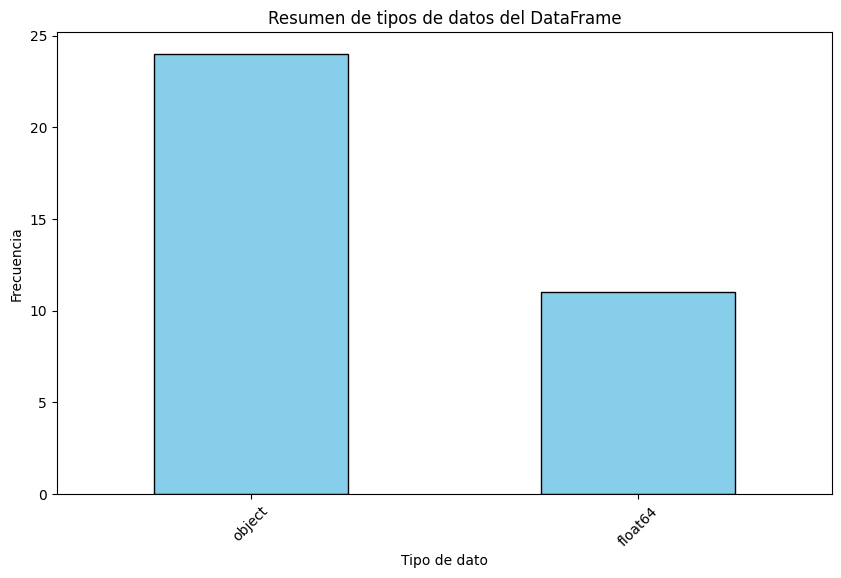

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Obtener el resumen de información del DataFrame
info = data_imp1.dtypes.value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
info.plot(kind='bar', color='skyblue', edgecolor='black')

# Agregar título y etiquetas de los ejes
plt.title('Resumen de tipos de datos del DataFrame')
plt.xlabel('Tipo de dato')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.show()


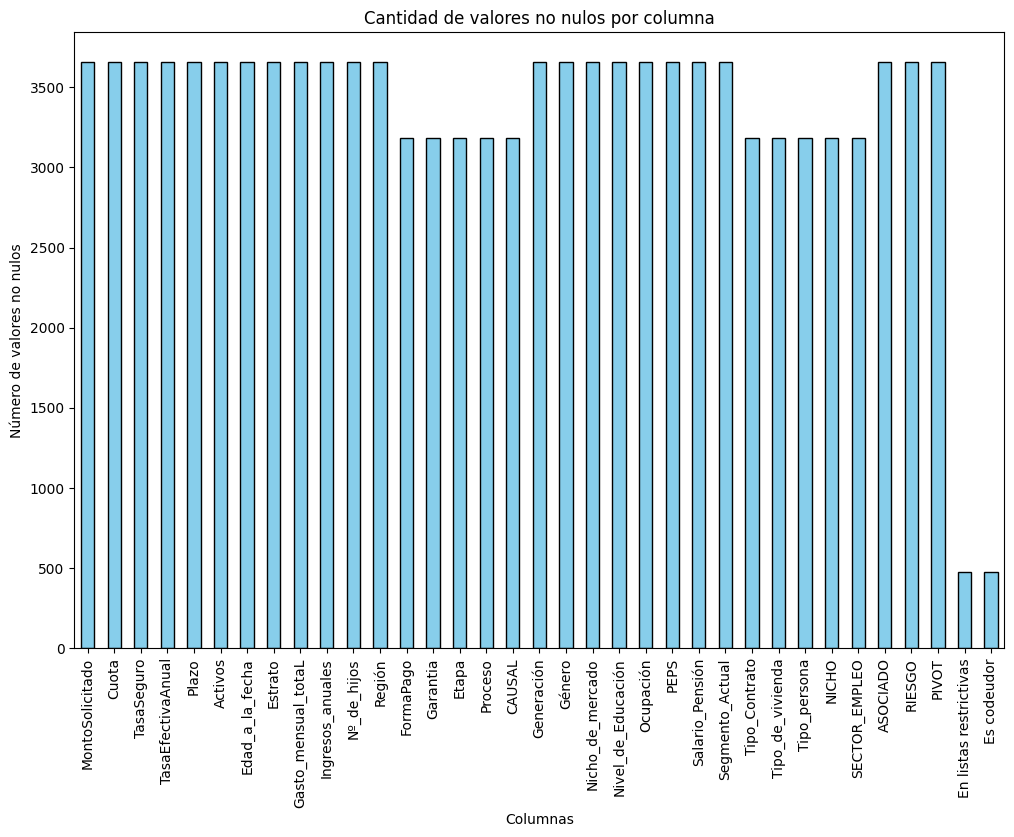

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Obtener el resumen de información del DataFrame
non_null_counts = data_imp1.notnull().sum()

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
non_null_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Agregar título y etiquetas de los ejes
plt.title('Cantidad de valores no nulos por columna')
plt.xlabel('Columnas')
plt.ylabel('Número de valores no nulos')

# Mostrar el gráfico
plt.xticks(rotation=90)
plt.show()


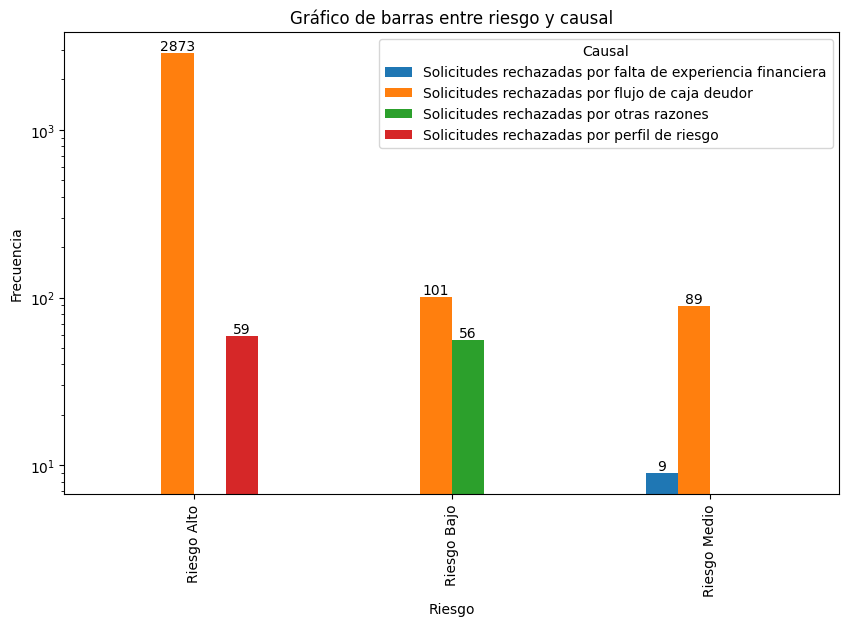

In [ ]:
# Contar la frecuencia de combinaciones de riesgo y causal
frecuencia = data_imp1.groupby(['RIESGO', 'CAUSAL']).size().unstack(fill_value=0)

# Crear el gráfico de barras
frecuencia.plot(kind='bar', stacked=False, figsize=(10, 6))

# Agregar título y etiquetas de los ejes
plt.yscale('log')
plt.title('Gráfico de barras entre riesgo y causal')
plt.xlabel('Riesgo')
plt.ylabel('Frecuencia')

for bar in plt.gca().patches:
    plt.gca().annotate('{:.0f}'.format(bar.get_height()),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='bottom')

# Mostrar el gráfico
plt.legend(title='Causal')
plt.show()

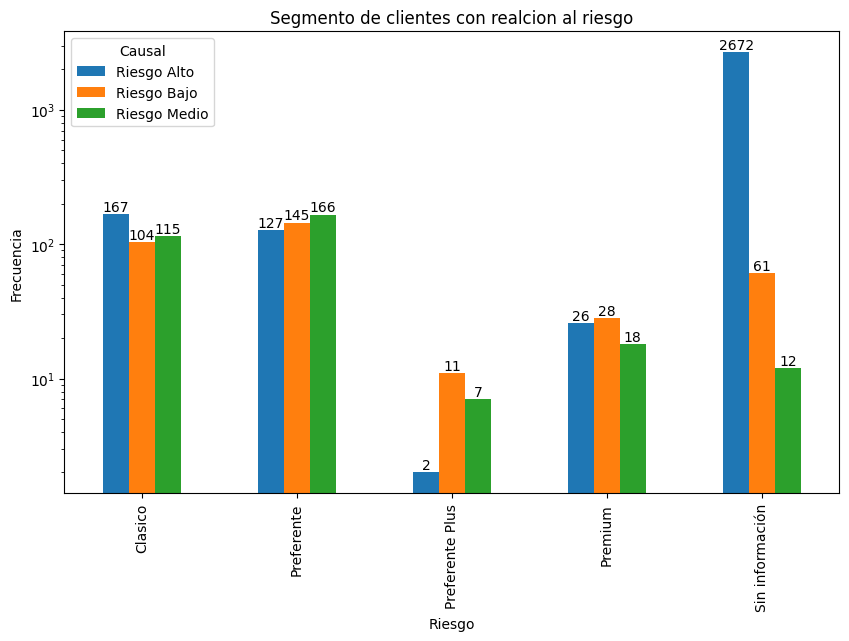

In [ ]:
# Contar la frecuencia de combinaciones de riesgo y causal
frecuencia = data_imp1.groupby(['Segmento_Actual', 'RIESGO']).size().unstack(fill_value=0)

# Crear el gráfico de barras
frecuencia.plot(kind='bar', stacked=False, figsize=(10, 6))

# Agregar título y etiquetas de los ejes
plt.yscale('log')
plt.title('Segmento de clientes con realcion al riesgo')
plt.xlabel('Riesgo')
plt.ylabel('Frecuencia')

for bar in plt.gca().patches:
    plt.gca().annotate('{:.0f}'.format(bar.get_height()),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='bottom')

# Mostrar el gráfico
plt.legend(title='Causal')
plt.show()

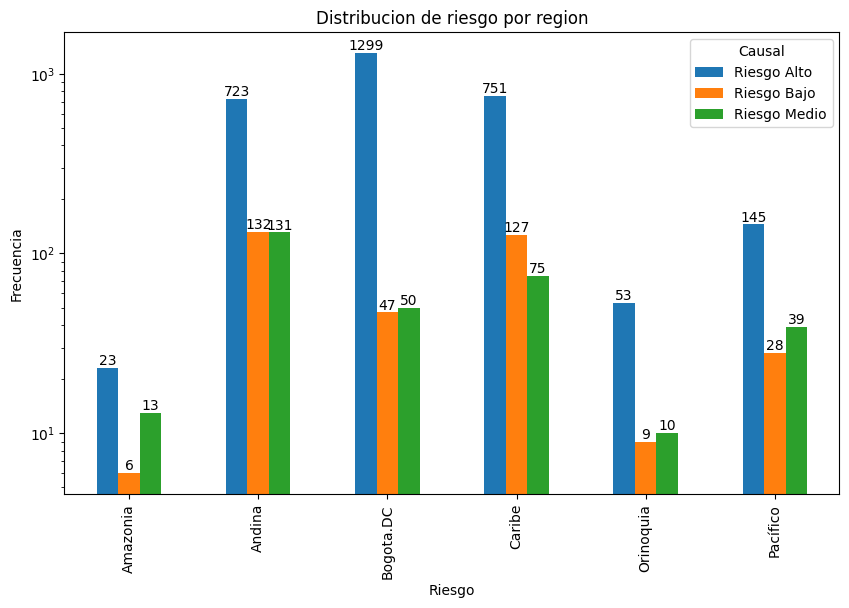

In [ ]:
# Contar la frecuencia de combinaciones de riesgo y causal
frecuencia = data_imp1.groupby(['Región', 'RIESGO']).size().unstack(fill_value=0)

# Crear el gráfico de barras
frecuencia.plot(kind='bar', stacked=False, figsize=(10, 6))

# Agregar título y etiquetas de los ejes
plt.yscale('log')
plt.title('Distribucion de riesgo por region')
plt.xlabel('Riesgo')
plt.ylabel('Frecuencia')

for bar in plt.gca().patches:
    plt.gca().annotate('{:.0f}'.format(bar.get_height()),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='bottom')

# Mostrar el gráfico
plt.legend(title='Causal')
plt.show()

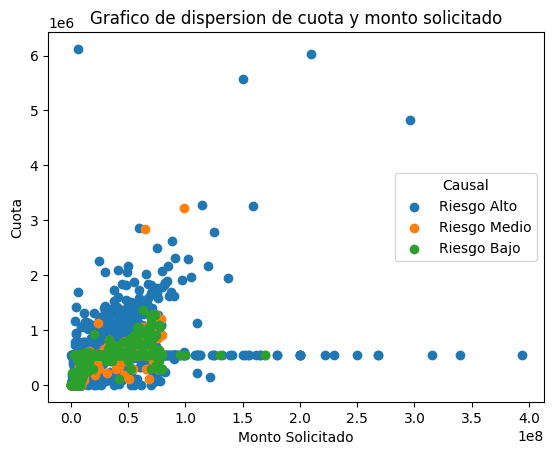

In [ ]:
# Obtener los valores únicos de la variable 'Causal'
categorias = data_imp1['RIESGO'].unique()

# Crear el gráfico de dispersión con leyenda
for categoria in categorias:
    subset = data_imp1[data_imp1['RIESGO'] == categoria]
    plt.scatter(subset['MontoSolicitado'], subset['Cuota'], label=categoria)

# Agregar leyenda
plt.legend(title='Causal')

# Agregar título y etiquetas de los ejes
plt.title('Grafico de dispersion de cuota y monto solicitado')
plt.xlabel('Monto Solicitado')
plt.ylabel('Cuota')

# Mostrar el gráfico
plt.show()

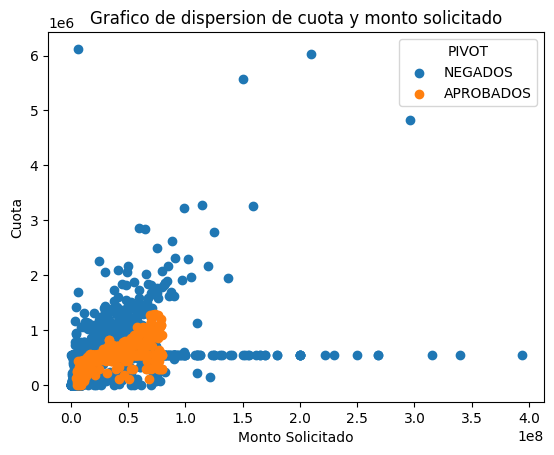

In [ ]:
# Obtener los valores únicos de la variable 'Causal'
categorias = data_imp1['PIVOT'].unique()

# Crear el gráfico de dispersión con leyenda
for categoria in categorias:
    subset = data_imp1[data_imp1['PIVOT'] == categoria]
    plt.scatter(subset['MontoSolicitado'], subset['Cuota'], label=categoria)

# Agregar leyenda
plt.legend(title='PIVOT')

# Agregar título y etiquetas de los ejes
plt.title('Grafico de dispersion de cuota y monto solicitado')
plt.xlabel('Monto Solicitado')
plt.ylabel('Cuota')

# Mostrar el gráfico
plt.show()

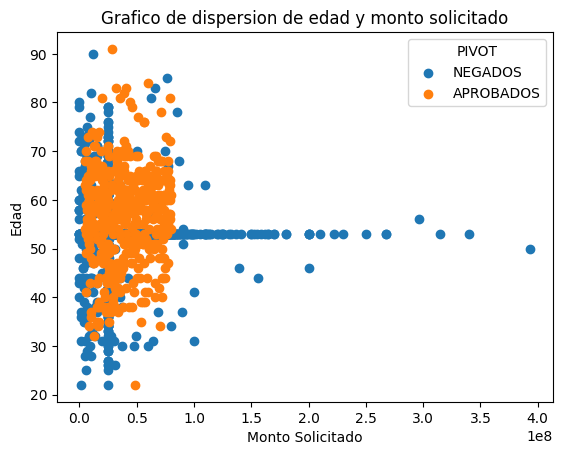

In [ ]:
# Obtener los valores únicos de la variable 'Causal'
categorias = data_imp1['PIVOT'].unique()

# Crear el gráfico de dispersión con leyenda
for categoria in categorias:
    subset = data_imp1[data_imp1['PIVOT'] == categoria]
    plt.scatter(subset['MontoSolicitado'], subset['Edad_a_la_fecha'], label=categoria)

# Agregar leyenda
plt.legend(title='PIVOT')

# Agregar título y etiquetas de los ejes
plt.title('Grafico de dispersion de edad y monto solicitado')
plt.xlabel('Monto Solicitado')
plt.ylabel('Edad')

# Mostrar el gráfico
plt.show()

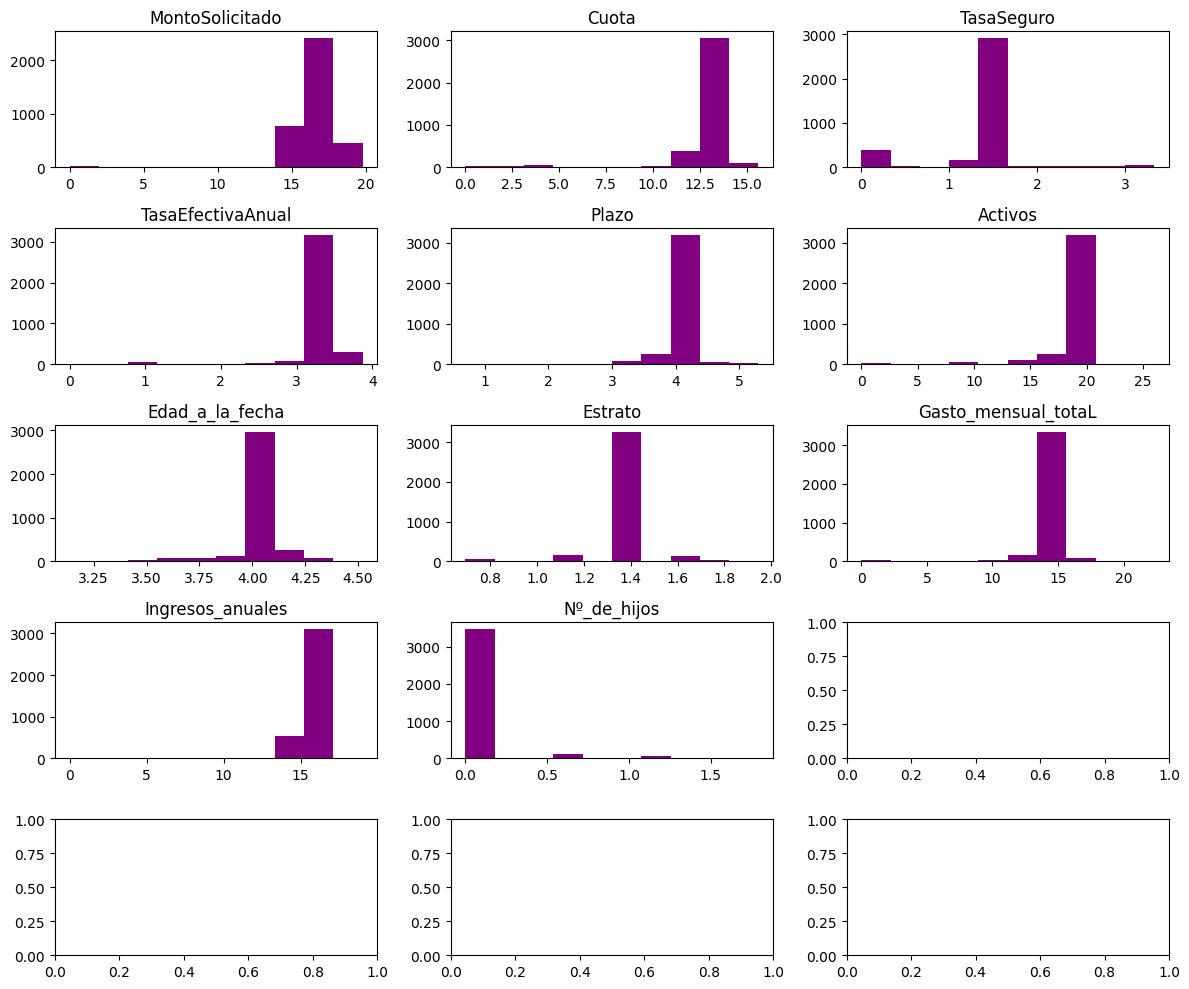

In [ ]:
df3 = data_imp1.select_dtypes(include= float)
df3.describe()

log = np.log1p(df3)
cols = log.columns

fig, axs = plt.subplots(5,3, figsize=(12, 10))
axs = axs.ravel()
for i, col in enumerate(cols):
  axs[i].hist(log[col], color='purple')
  axs[i].set_title(col)

plt.tight_layout()
plt.show()

In [ ]:
log.describe()

MontoSolicitado        Cuota   TasaSeguro  TasaEfectivaAnual  \
count      3661.000000  3661.000000  3661.000000        3661.000000   
mean         16.571810    12.836560     1.319131           3.390900   
std           1.604461     1.723578     0.523980           0.386189   
min           0.000000     0.000000     0.000000           0.000000   
25%          15.980708    13.139352     1.425515           3.450305   
50%          16.811243    13.192065     1.425515           3.450305   
75%          17.431748    13.192065     1.425515           3.450305   
max          19.790793    15.627367     3.331847           3.872866   

             Plazo      Activos  Edad_a_la_fecha      Estrato  \
count  3661.000000  3661.000000      3661.000000  3661.000000   
mean      4.057639    18.110185         3.990571     1.376842   
std       0.242139     2.227490         0.117764     0.124853   
min       0.693147     0.000000         3.135494     0.693147   
25%       4.094345    18.600281         3.988984     1.386294   
50%       4.094345    18.600281         3.988984     1.386294   
75%       4.094345    18.600281         3.988984     1.386294   
max       5.303305    26.021583         4.521789     1.945910   

       Gasto_mensual_totaL  Ingresos_anuales  Nº_de_hijos  
count          3661.000000       3661.000000  3661.000000  
mean             14.272436         15.255593     0.044362  
std               1.579625          1.034347     0.201744  
min               0.000000          0.000000     0.000000  
25%              14.496968         15.378969     0.000000  
50%              14.496968         15.378969     0.000000  
75%              14.496968         15.378969     0.000000  
max              22.332704         19.014342     1.791759

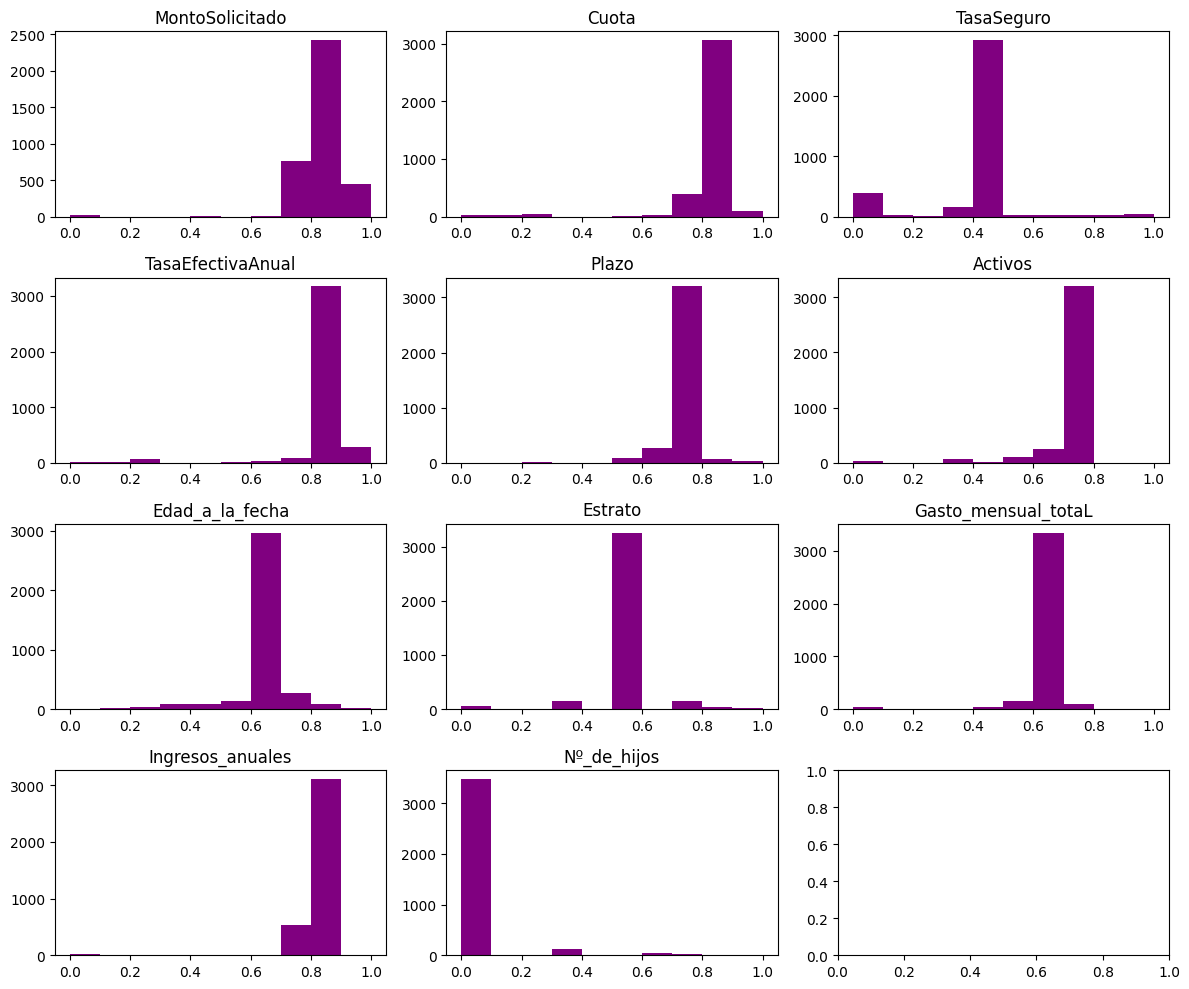

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Supongamos que 'log' es tu DataFrame después de aplicar la transformación logarítmica
# Crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Normaliza los datos transformados
log_normalized = scaler.fit_transform(log)

# Convierte el resultado en un DataFrame
log_normalized_df = pd.DataFrame(log_normalized, columns=cols)

# Ahora 'log_normalized_df' contiene tus datos normalizados
cols = log_normalized_df

fig, axs = plt.subplots(4,3, figsize=(12, 10))
axs = axs.ravel()
for i, col in enumerate(cols):
  axs[i].hist(log_normalized_df[col], color='purple')
  axs[i].set_title(col)

plt.tight_layout()
plt.show()

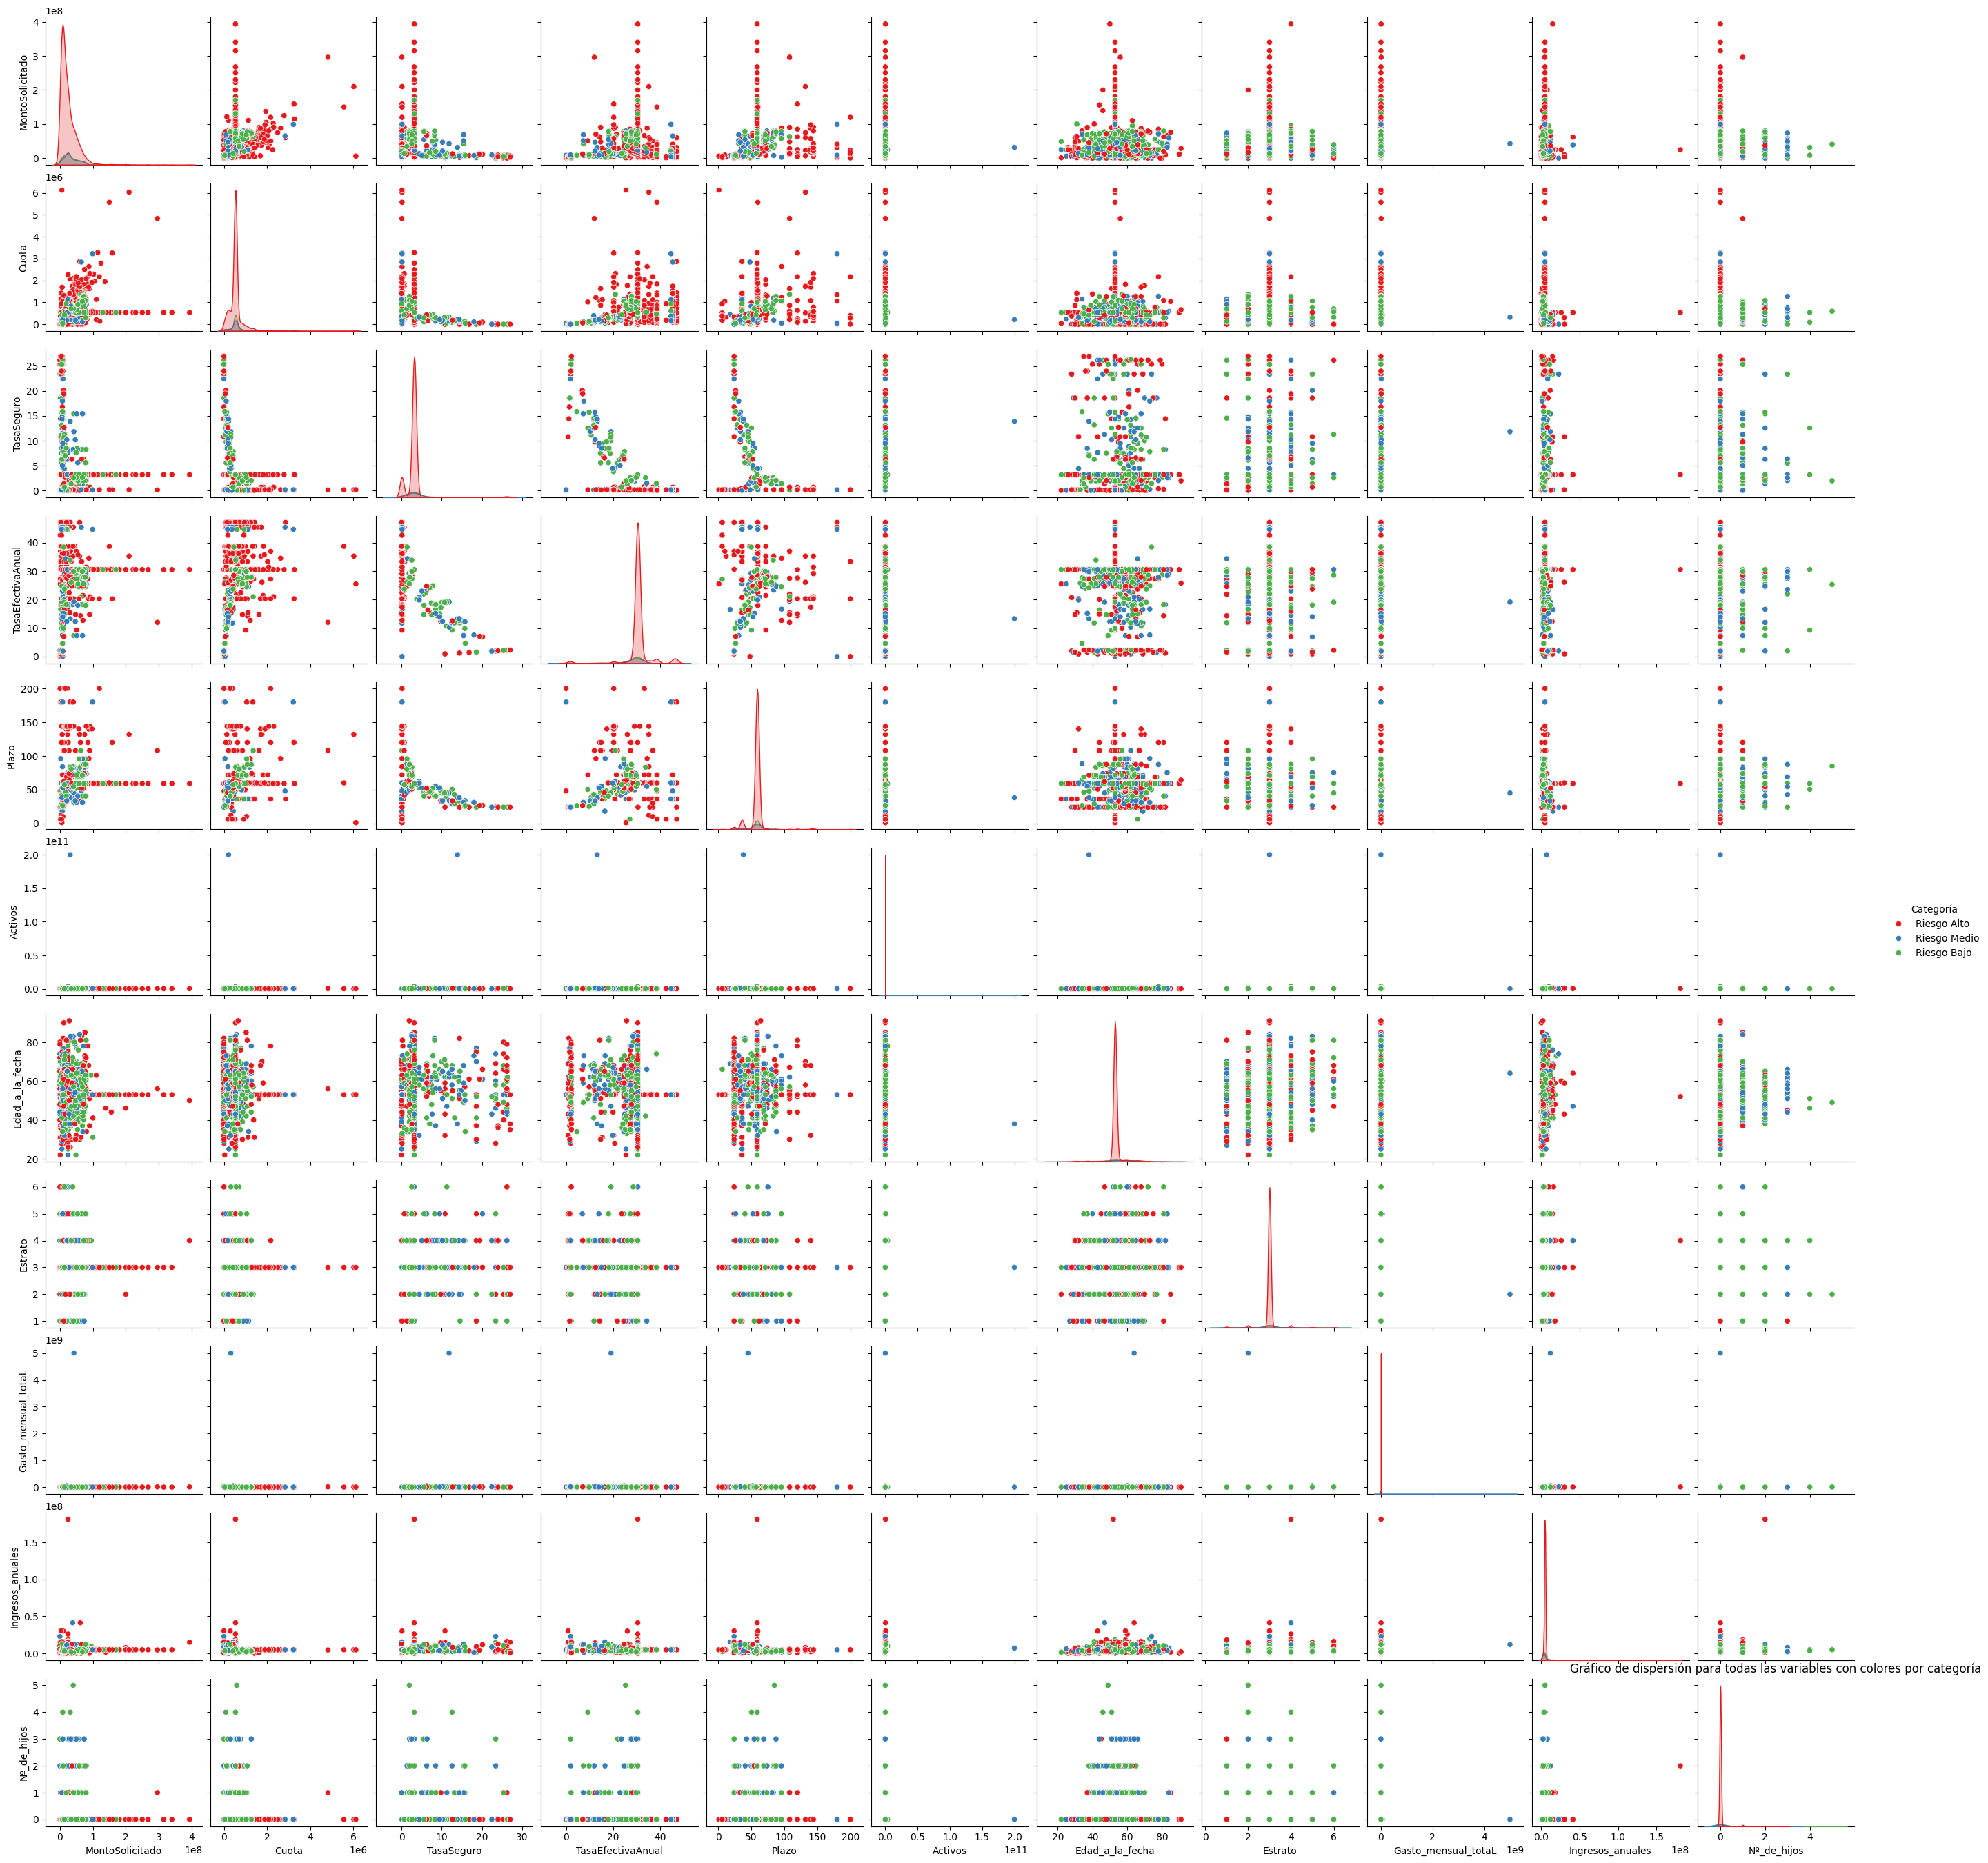

In [ ]:
# Seleccionar solo las columnas numéricas para el gráfico de dispersión
columnas_numericas = data_imp1.select_dtypes(include=['float64', 'int64'])

# Agregar la columna 'categoria' al DataFrame de columnas numéricas
columnas_numericas['RIESGO'] = data['RIESGO']

# Cambiar el nombre de la columna 'categoria' para que no interfiera con el gráfico de pares
columnas_numericas = columnas_numericas.rename(columns={'RIESGO': 'Categoría'})

# Crear el gráfico de pares con colores por categoría
sns.pairplot(columnas_numericas, hue='Categoría', palette='Set1')
plt.title('Gráfico de dispersión para todas las variables con colores por categoría')
plt.show()

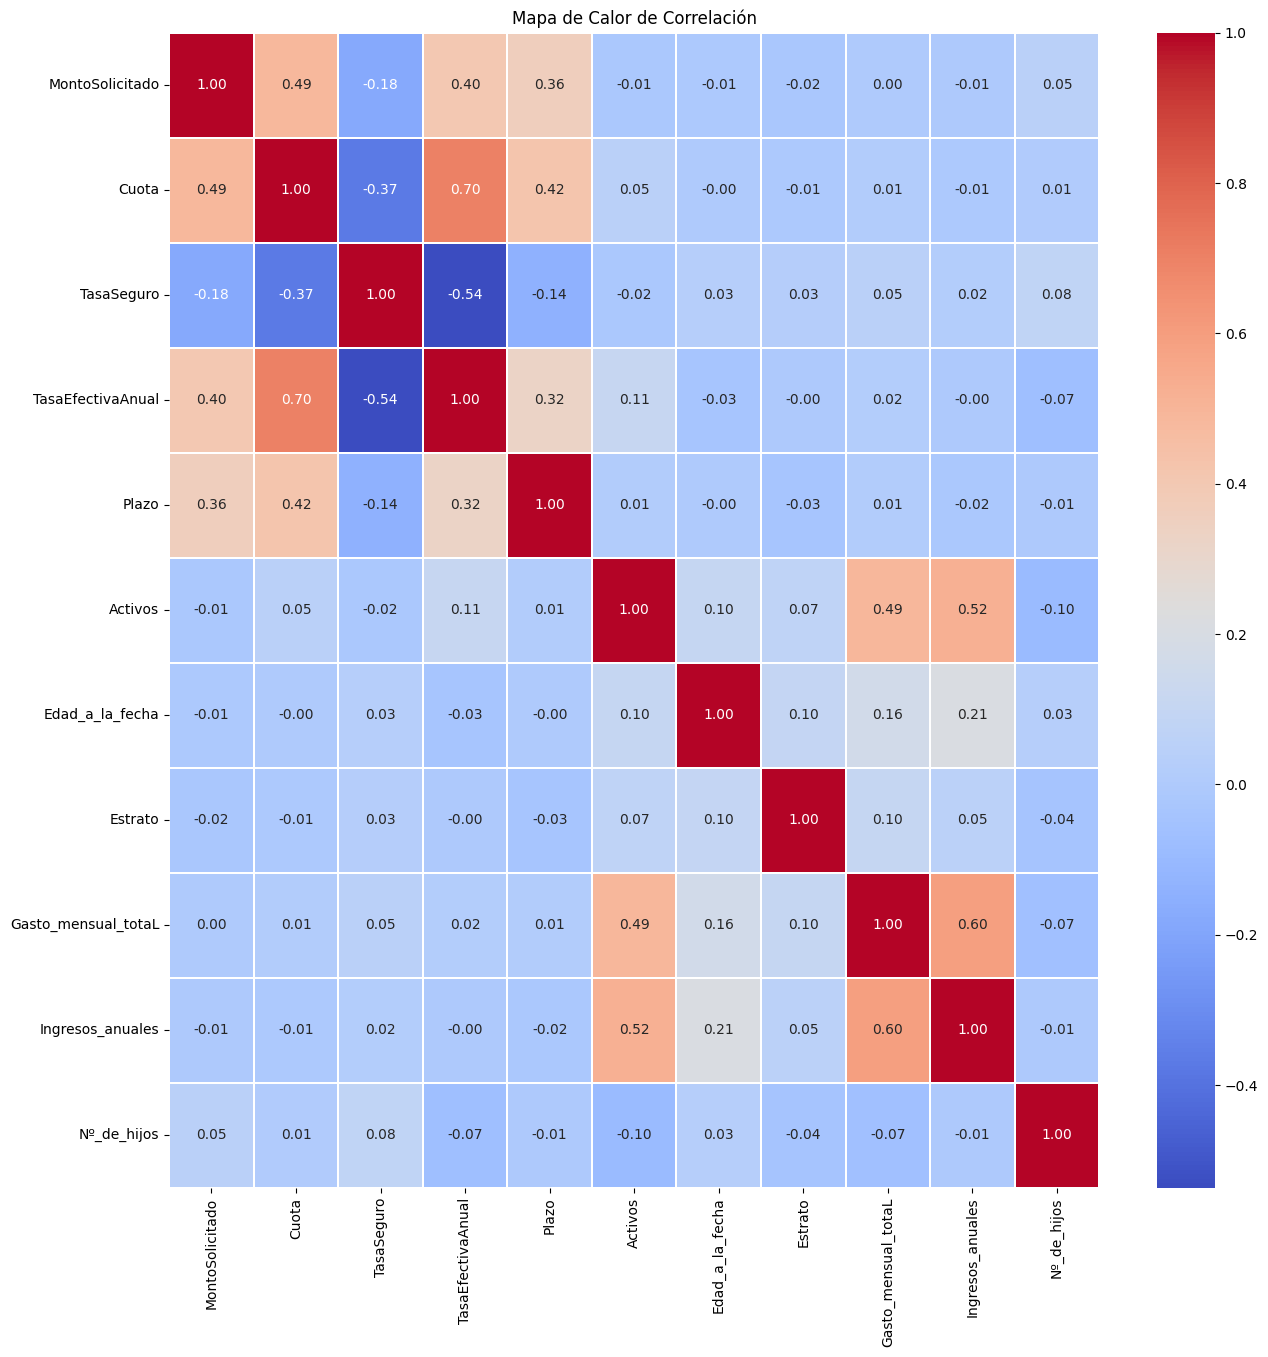

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = log_normalized_df.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix,  cmap='coolwarm', linewidths=.1,fmt=".2f",annot=True)
plt.title('Mapa de Calor de Correlación')
plt.show()

In [ ]:
df4 = data_imp1.select_dtypes(include= object)
df4.describe()

Región  FormaPago Garantia    Etapa  Proceso  \
count        3661       3187     3187     3187     3187   
unique          6          2        4        2        3   
top     Bogota.DC  Nomina 50       NR  Negados  DIGITAL   
freq         1396       2750     2718     3106     3136   

                                                 CAUSAL Generación Género  \
count                                              3187       3661   3661   
unique                                                4          5      3   
top     Solicitudes rechazadas por flujo de caja deudor          X     NR   
freq                                               3063       3264   2746   

       Nicho_de_mercado Nivel_de_Educación  ...    Tipo_Contrato  \
count              3661               3661  ...             3187   
unique               20                  8  ...                9   
top        Otros Nichos            Ninguno  ...  Sin información   
freq               2982               2757  ...             2821   

       Tipo_de_vivienda Tipo_persona         NICHO SECTOR_EMPLEO ASOCIADO  \
count              3187         3187          3187          3187     3661   
unique                5            1            11             5        2   
top     Sin Información      Natural  OTROS NICHOS   OTRO_SECTOR       No   
freq               2751         3187          2779          2779     2912   

             RIESGO    PIVOT En listas restrictivas Es codeudor  
count          3661     3661                    474         474  
unique            3        2                      1           2  
top     Riesgo Alto  NEGADOS                     No          No  
freq           2994     3187                    474         472  

[4 rows x 24 columns]

In [ ]:
datos_dummies = pd.get_dummies(df4,columns=['Región','FormaPago','Garantia','Etapa','Proceso','CAUSAL','Generación','Género','Nicho_de_mercado','Nivel_de_Educación','Ocupación','PEPS','Salario_Pensión','Segmento_Actual'
,'Tipo_Contrato','Tipo_de_vivienda','Tipo_persona','NICHO','SECTOR_EMPLEO','ASOCIADO','RIESGO','En listas restrictivas','Es codeudor'])
datos_dummies

PIVOT  Región_Amazonia  Región_Andina  Región_Bogota.DC  \
0       NEGADOS            False          False              True   
1       NEGADOS            False          False              True   
2       NEGADOS            False          False              True   
3       NEGADOS            False           True             False   
4       NEGADOS            False          False              True   
...         ...              ...            ...               ...   
3656  APROBADOS            False          False             False   
3657  APROBADOS            False          False              True   
3658  APROBADOS            False          False             False   
3659  APROBADOS            False           True             False   
3660  APROBADOS            False           True             False   

      Región_Caribe  Región_Orinoquia  Región_Pacífico  FormaPago_Caja  \
0             False             False            False            True   
1             False             False            False           False   
2             False             False            False            True   
3             False             False            False            True   
4             False             False            False            True   
...             ...               ...              ...             ...   
3656          False             False             True           False   
3657          False             False            False           False   
3658          False              True            False           False   
3659          False             False            False           False   
3660          False             False            False           False   

      FormaPago_Nomina 50  Garantia_24  ...  SECTOR_EMPLEO_PRIVADA  \
0                   False        False  ...                  False   
1                    True         True  ...                  False   
2                   False         True  ...                  False   
3                   False         True  ...                  False   
4                   False         True  ...                  False   
...                   ...          ...  ...                    ...   
3656                False        False  ...                  False   
3657                False        False  ...                  False   
3658                False        False  ...                  False   
3659                False        False  ...                  False   
3660                False        False  ...                  False   

      SECTOR_EMPLEO_PÚBLICO  ASOCIADO_No  ASOCIADO_Si  RIESGO_Riesgo Alto  \
0                     False         True        False                True   
1                      True        False         True                True   
2                     False         True        False                True   
3                     False         True        False                True   
4                     False         True        False                True   
...                     ...          ...          ...                 ...   
3656                  False        False         True               False   
3657                  False        False         True               False   
3658                  False        False         True               False   
3659                  False        False         True               False   
3660                  False        False         True               False   

      RIESGO_Riesgo Bajo  RIESGO_Riesgo Medio  En listas restrictivas_No  \
0                  False                False                      False   
1                  False                False                      False   
2                  False                False                      False   
3                  False                False                      False   
4                  False                False                      False   
...                  ...                  ...                        .

In [ ]:
df_com = pd.concat([log_normalized_df, datos_dummies], axis=1)
df_com

MontoSolicitado     Cuota  TasaSeguro  TasaEfectivaAnual     Plazo  \
0            0.924311  0.945963    0.034014           0.921604  0.841959   
1            0.916234  0.920423    0.041947           0.851771  0.910425   
2            0.849448  0.857475    0.034014           0.912873  0.741347   
3            0.849448  0.869726    0.149936           0.938637  0.741347   
4            0.827681  0.842160    0.149936           0.938637  0.741347   
...               ...       ...         ...                ...       ...   
3656         0.917698  0.889195    0.328287           0.867653  0.821821   
3657         0.830360  0.829030    0.154454           0.827600  0.731899   
3658         0.913636  0.874245    0.322645           0.846473  0.778511   
3659         0.918184  0.805552    0.565645           0.760301  0.657273   
3660         0.911375  0.886429    0.383917           0.885393  0.777911   

       Activos  Edad_a_la_fecha   Estrato  Gasto_mensual_totaL  \
0     0.714802         0.615663  0.553295             0.649136   
1     0.707900         0.813093  0.553295             0.660398   
2     0.714802         0.615663  0.553295             0.649136   
3     0.714802         0.615663  0.553295             0.649136   
4     0.714802         0.615663  0.553295             0.649136   
...        ...              ...       ...                  ...   
3656  0.571887         0.641896  0.553295             0.645460   
3657  0.596643         0.823182  0.553295             0.632325   
3658  0.672687         0.615663  0.553295             0.636778   
3659  0.787812         0.738219  0.876951             0.667815   
3660  0.592775         0.667210  0.553295             0.412419   

      Ingresos_anuales  ...  SECTOR_EMPLEO_PRIVADA SECTOR_EMPLEO_PÚBLICO  \
0             0.808809  ...                  False                 False   
1             0.812089  ...                  False                  True   
2             0.808809  ...                  False                 False   
3             0.808809  ...                  False                 False   
4             0.808809  ...                  False                 False   
...                ...  ...                    ...                   ...   
3656          0.781579  ...                  False                 False   
3657          0.783425  ...                  False                 False   
3658          0.810637  ...                  False                 False   
3659          0.856906  ...                  False                 False   
3660          0.763221  ...                  False                 False   

      ASOCIADO_No  ASOCIADO_Si  RIESGO_Riesgo Alto  RIESGO_Riesgo Bajo  \
0            True        False                True               False   
1           False         True                True               False   
2            True        False                True               False   
3            True        False                True               False   
4            True        False                True               False   
...           ...          ...                 ...                 ...   
3656        False         True               False                True   
3657        False         True               False                True   
3658        False         True               False                True   
3659        False         True               False                True   
3660        False         True               False                True   

      RIESGO_Riesgo Medio  En listas restrictivas_No  Es codeudor_No  \
0                   False                      False           False   
1                   False                      False           False   
2                   False                      False           False   
3                   False                      False           False   
4                   False                      False           False   
...                   ...                        ...             .

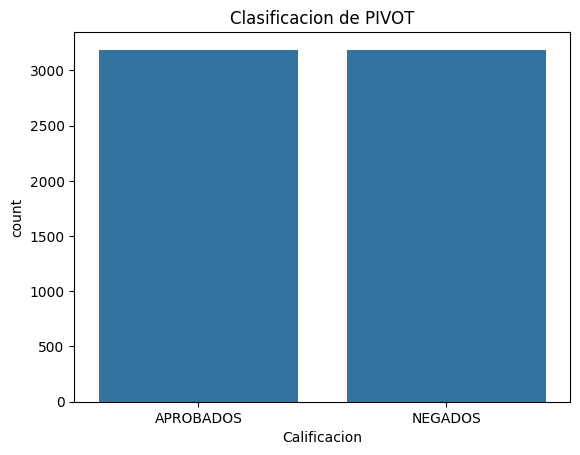

In [ ]:
# Balancear

from sklearn.utils import resample

N = df_com.groupby(["PIVOT"]).size()["NEGADOS"]
S_sample = resample(df_com[df_com.PIVOT =="APROBADOS"],n_samples = N,random_state=10,replace=True)

## Concatenar

df_bal = pd.concat([S_sample,df_com[df_com.PIVOT=="NEGADOS"]])
df_bal.PIVOT.value_counts()

sns.countplot(x=df_bal.PIVOT)   # Estudiar criterios de desbalanceo
plt.title("Clasificacion de PIVOT")
plt.xlabel("Calificacion")
plt.show();

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Codificar las variables categóricas utilizando Label Encoding
label_encoder = LabelEncoder()
categorical_columns = ['PIVOT']
for column in categorical_columns:
    df_bal[column] = label_encoder.fit_transform(df_bal[column])

In [ ]:
df_bal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6374 entries, 3452 to 3186
Columns: 126 entries, MontoSolicitado to Es codeudor_Sí
dtypes: bool(114), float64(11), int64(1)
memory usage: 1.3 MB


In [ ]:
from matplotlib.colors import Colormap
import plotly.express as px

fig = px.imshow((df_bal.corr()*100).round(2), text_auto=True, width=1800,height=1800, color_continuous_scale='Armyrose', color_continuous_midpoint=0, title='Correlación')
fig.update_layout(xaxis={'side': 'bottom'})
fig.show();

<ipython-input-39-5cb49ee7ced3>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




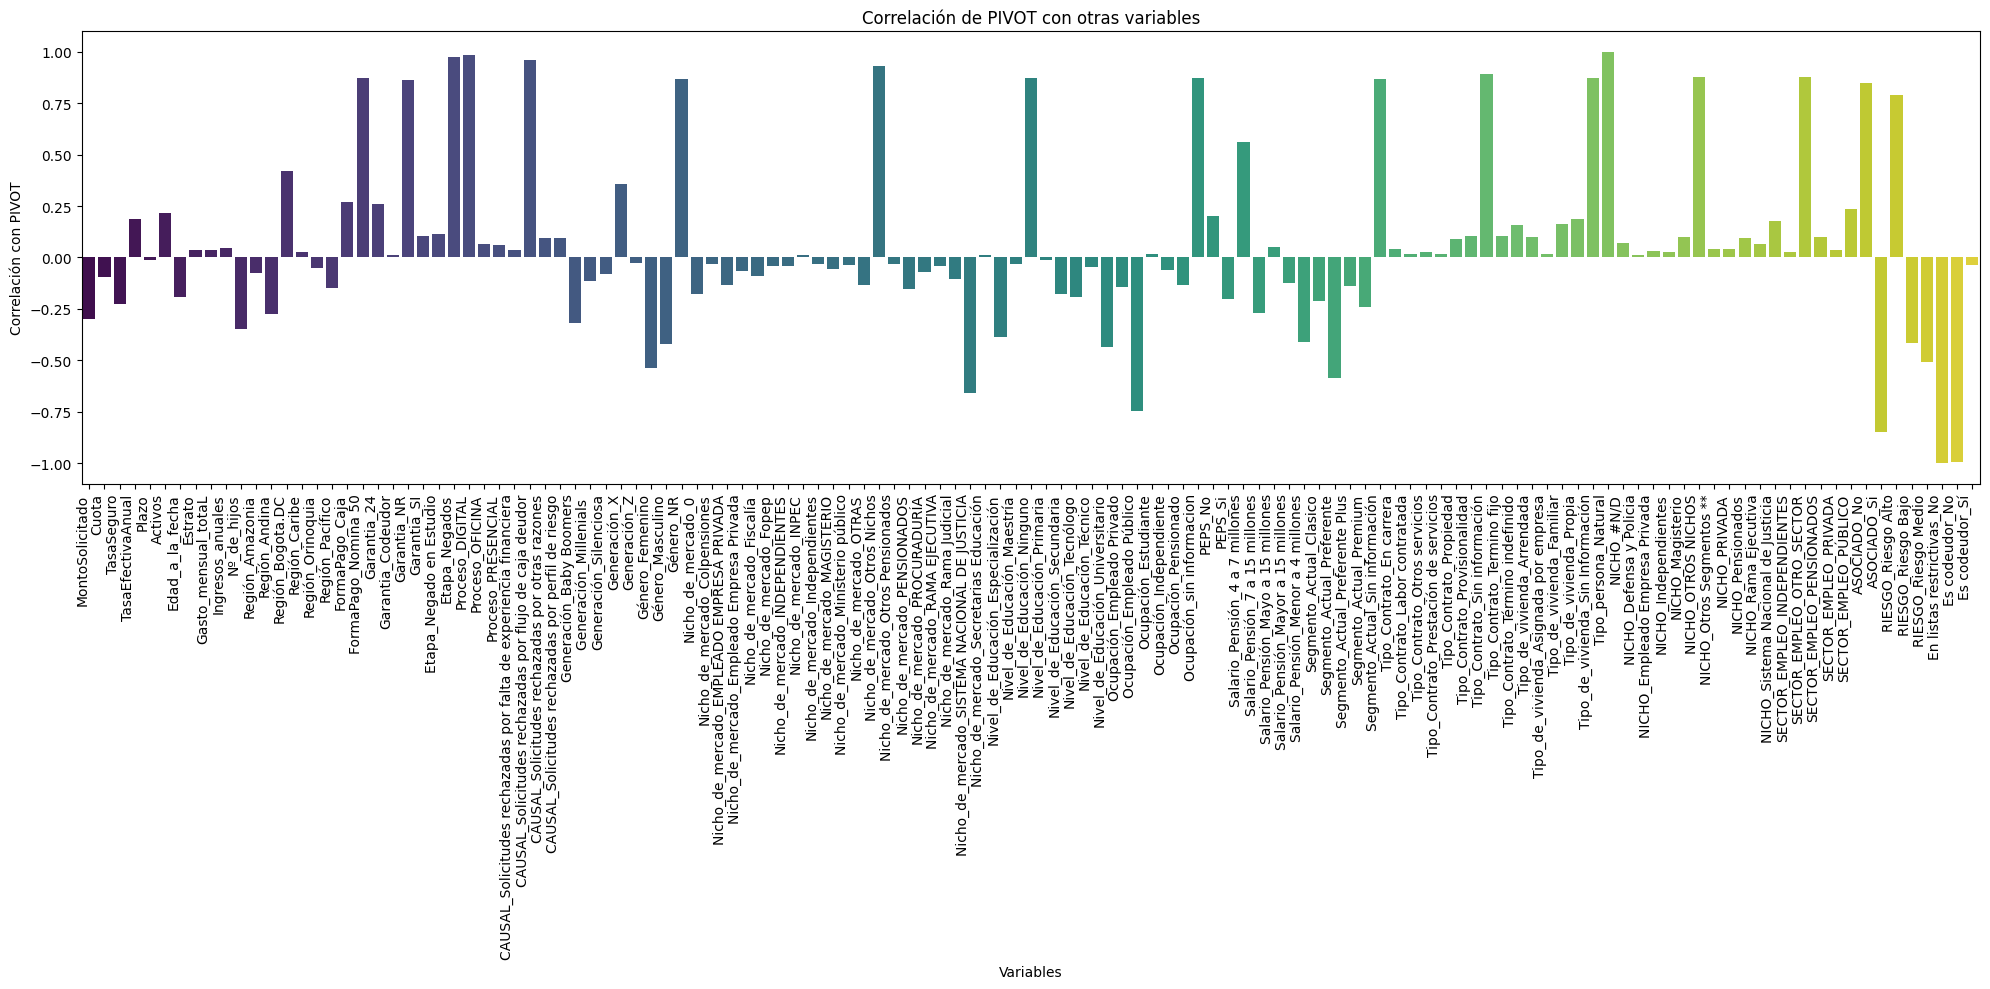

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener la matriz de correlación
corr_matrix = df_bal.corr()

# Filtrar solo la correlación de 'PIVOT' con otras variables
correlation_with_pivot = corr_matrix['PIVOT'].drop('PIVOT')

# Crear un gráfico de barras para visualizar la correlación de 'PIVOT' con otras variables
plt.figure(figsize=(20, 10))
sns.barplot(x=correlation_with_pivot.index, y=correlation_with_pivot.values, palette='viridis')
plt.xlabel('Variables')
plt.ylabel('Correlación con PIVOT')
plt.title('Correlación de PIVOT con otras variables')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# Calcula la matriz de correlación
correlation_matrix = df_bal.corr()

# Filtra las variables cuya correlación absoluta con 'PIVOT' sea menor al 50%
correlation_threshold = 0.1
low_correlation_vars = correlation_matrix[abs(correlation_matrix['PIVOT']) < correlation_threshold]['PIVOT']

# Obtiene los nombres de las variables que cumplen con el criterio
low_correlation_var_names = low_correlation_vars.index.tolist()

# Imprime los nombres de las variables
print("Variables con correlación menor al 10% con 'PIVOT':")
print(low_correlation_var_names)


Variables con correlación menor al 10% con 'PIVOT':
['Cuota', 'Plazo', 'Estrato', 'Gasto_mensual_totaL', 'Ingresos_anuales', 'Región_Amazonia', 'Región_Caribe', 'Región_Orinoquia', 'Garantia_Codeudor', 'Proceso_OFICINA', 'Proceso_PRESENCIAL', 'CAUSAL_Solicitudes rechazadas por falta de experiencia financiera', 'CAUSAL_Solicitudes rechazadas por otras razones', 'CAUSAL_Solicitudes rechazadas por perfil de riesgo', 'Generación_Silenciosa', 'Generación_Z', 'Nicho_de_mercado_Colpensiones', 'Nicho_de_mercado_Empleado Empresa Privada', 'Nicho_de_mercado_Fiscalía', 'Nicho_de_mercado_Fopep', 'Nicho_de_mercado_INDEPENDIENTES', 'Nicho_de_mercado_INPEC', 'Nicho_de_mercado_Independientes', 'Nicho_de_mercado_MAGISTERIO', 'Nicho_de_mercado_Ministerio público', 'Nicho_de_mercado_Otros Pensionados', 'Nicho_de_mercado_PROCURADURÍA', 'Nicho_de_mercado_RAMA EJECUTIVA', 'Nicho_de_mercado_Secretarias Educación', 'Nivel_de_Educación_Maestría', 'Nivel_de_Educación_Primaria', 'Nivel_de_Educación_Técnico', 'Oc

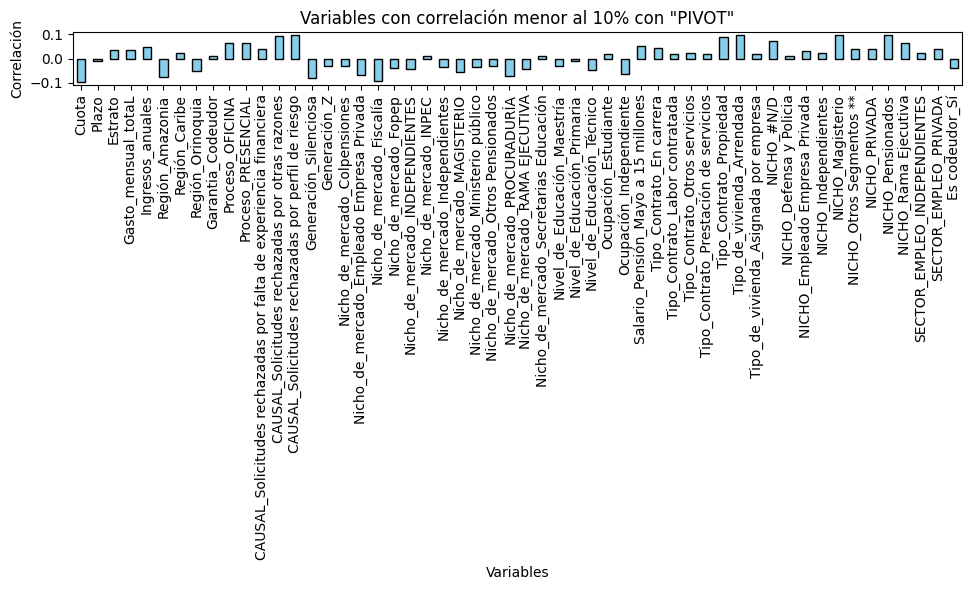

In [ ]:
import matplotlib.pyplot as plt

# Graficar las variables con correlación menor al 10% con 'PIVOT'
plt.figure(figsize=(10, 6))
low_correlation_vars.plot(kind='bar', color='skyblue', edgecolor='black')

# Agregar título y etiquetas de los ejes
plt.title('Variables con correlación menor al 10% con "PIVOT"')
plt.xlabel('Variables')
plt.ylabel('Correlación')

# Mostrar el gráfico
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


X = df_bal[['Cuota', 'TasaSeguro', 'Plazo', 'Estrato', 'Gasto_mensual_totaL', 'Ingresos_anuales', 'Región_Amazonia',
'Región_Caribe', 'Región_Orinoquia', 'Garantia_Codeudor', 'Proceso_OFICINA', 'Proceso_PRESENCIAL',
'CAUSAL_Solicitudes rechazadas por falta de experiencia financiera', 'CAUSAL_Solicitudes rechazadas por otras razones',
'CAUSAL_Solicitudes rechazadas por perfil de riesgo', 'Generación_Silenciosa', 'Generación_Z', 'Nicho_de_mercado_Colpensiones',
'Nicho_de_mercado_Empleado Empresa Privada', 'Nicho_de_mercado_Fiscalía', 'Nicho_de_mercado_Fopep',
'Nicho_de_mercado_INDEPENDIENTES', 'Nicho_de_mercado_INPEC', 'Nicho_de_mercado_Independientes', 'Nicho_de_mercado_MAGISTERIO',
 'Nicho_de_mercado_Ministerio público', 'Nicho_de_mercado_Otros Pensionados', 'Nicho_de_mercado_PROCURADURÍA',
'Nicho_de_mercado_RAMA EJECUTIVA', 'Nicho_de_mercado_Secretarias Educación', 'Nivel_de_Educación_Maestría',
'Nivel_de_Educación_Primaria', 'Nivel_de_Educación_Técnico', 'Ocupación_Estudiante', 'Ocupación_Independiente',
'Salario_Pensión_Mayo a 15 millones', 'Tipo_Contrato_En carrera', 'Tipo_Contrato_Labor contratada',
'Tipo_Contrato_Otros servicios', 'Tipo_Contrato_Prestación de servicios', 'Tipo_Contrato_Propiedad', 'Tipo_de_vivienda_Arrendada',
'Tipo_de_vivienda_Asignada por empresa', 'NICHO_#N/D', 'NICHO_Defensa y Policia', 'NICHO_Empleado Empresa Privada',
'NICHO_Independientes', 'NICHO_Magisterio', 'NICHO_Otros Segmentos **', 'NICHO_PRIVADA', 'NICHO_Pensionados', 'NICHO_Rama Ejecutiva',
'SECTOR_EMPLEO_INDEPENDIENTES', 'SECTOR_EMPLEO_PRIVADA', 'Es codeudor_Sí']]

y = df_bal['PIVOT']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
y

3452    0
3312    0
3202    0
3507    0
3556    0
       ..
3182    1
3183    1
3184    1
3185    1
3186    1
Name: PIVOT, Length: 6374, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [None, 10, 20, 25, 30, 35],
    'min_samples_split': [2, 5, 10,15,20],
    'min_samples_leaf': [1, 2, 4,6,8,10]
}

# Inicializar el modelo RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=42)

# Inicializar GridSearchCV con el modelo y los hiperparámetros
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5)

# Ajustar GridSearchCV a los datos
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_

# Crear un nuevo modelo RandomForestClassifier con los mejores hiperparámetros
best_random_forest_model = RandomForestClassifier(**best_params, random_state=42)

# Entrenar el modelo con los mejores hiperparámetros
best_random_forest_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_best = best_random_forest_model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy_best = accuracy_score(y_test, y_pred_best)## Cambiar por f1
report_best = classification_report(y_test, y_pred_best)

# Imprimir métricas de rendimiento
print("Mejores hiperparámetros:", best_params)
print("Exactitud del modelo Random Forest con mejores hiperparámetros:", accuracy_best)
print("Informe de clasificación:\n", report_best)

Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}
Exactitud del modelo Random Forest con mejores hiperparámetros: 0.9884997386304234
Informe de clasificación:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       962
           1       1.00      0.98      0.99       951

    accuracy                           0.99      1913
   macro avg       0.99      0.99      0.99      1913
weighted avg       0.99      0.99      0.99      1913



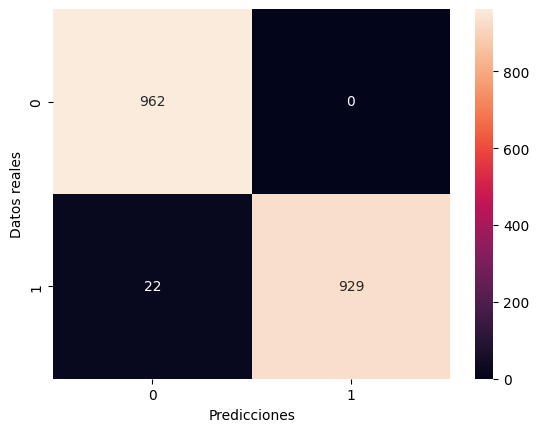

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred_best)

# Mostrar la matriz de confusión en un mapa de calor
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicciones")
plt.ylabel("Datos reales")
plt.show();

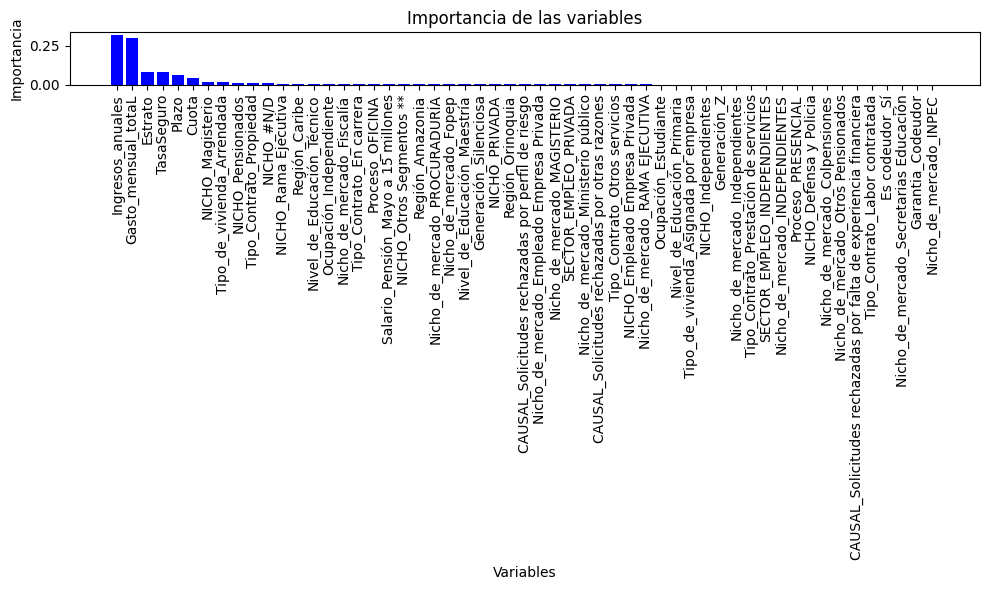

In [ ]:
# Obtener la importancia de las variables
importances = best_random_forest_model.feature_importances_
indices = np.argsort(importances)[::-1]  # Ordenar los índices de forma descendente

# Mostrar las variables más influyentes en forma de gráfico de barras
plt.figure(figsize=(10, 6))
plt.title("Importancia de las variables")
plt.bar(range(X_train.shape[1]), importances[indices], color='b', align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel("Variables")
plt.ylabel("Importancia")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
# Crear y entrenar un modelo Gradient Boosting

# Definir los hiperparámetros que deseas ajustar
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2, 3],
    'subsample': [0.8, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']}

# Inicializar el modelo GradientBoostingClassifier
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Inicializar GridSearchCV con el modelo y los hiperparámetros
grid_search = GridSearchCV(estimator=gradient_boosting_model, param_grid=param_grid, cv=5)

# Ajustar GridSearchCV a los datos
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_

# Crear un nuevo modelo GradientBoostingClassifier con los mejores hiperparámetros
best_gradient_boosting_model = GradientBoostingClassifier(**best_params, random_state=42)

# Entrenar el modelo con los mejores hiperparámetros
best_gradient_boosting_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_best = best_gradient_boosting_model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy_best = accuracy_score(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best)

# Imprimir métricas de rendimiento
print("Mejores hiperparámetros:", best_params)
print("Exactitud del modelo Gradient Boosting con mejores hiperparámetros:", accuracy_best)
print("Informe de clasificación:\n", report_best)

Se han truncado las últimas 5000 líneas del flujo de salida.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/d

Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}
Exactitud del modelo Gradient Boosting con mejores hiperparámetros: 0.9832723470987977
Informe de clasificación:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       962
           1       1.00      0.97      0.98       951

    accuracy                           0.98      1913
   macro avg       0.98      0.98      0.98      1913
weighted avg       0.98      0.98      0.98      1913



/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

num_folds = 5  # Número de pliegues (folds) en los que se dividirá el conjunto de datos
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)  # Se inicializa el objeto KFold


# Realiza la validación cruzada
scores = cross_val_score(best_gradient_boosting_model, X, y, cv=kf, scoring='accuracy')

# Imprime los resultados de la validación cruzada
print("Precisión para cada fold:", scores)
print("Precisión promedio:", np.mean(scores))
print("Desviación estándar de la precisión:", np.std(scores))

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`m

Precisión para cada fold: [0.97882353 0.98509804 0.98117647 0.98196078 0.98508634]
Precisión promedio: 0.9824290331517223
Desviación estándar de la precisión: 0.0024071855795223026


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`m

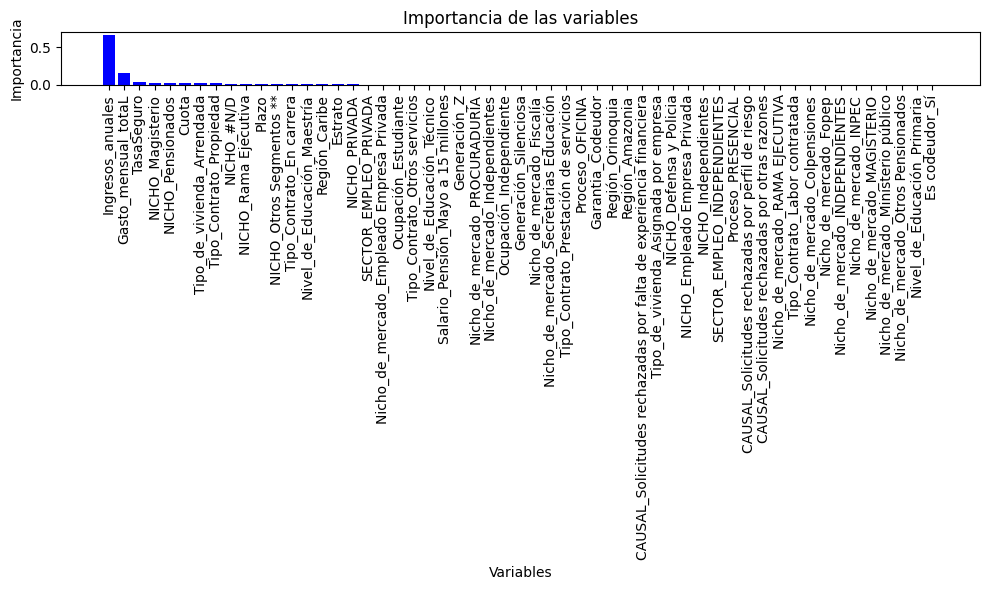

In [ ]:
# Obtener la importancia de las variables
importances = best_gradient_boosting_model.feature_importances_
indices = np.argsort(importances)[::-1]  # Ordenar los índices de forma descendente

# Mostrar las variables más influyentes en forma de gráfico de barras
plt.figure(figsize=(10, 6))
plt.title("Importancia de las variables")
plt.bar(range(X_train.shape[1]), importances[indices], color='b', align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel("Variables")
plt.ylabel("Importancia")
plt.tight_layout()
plt.show()

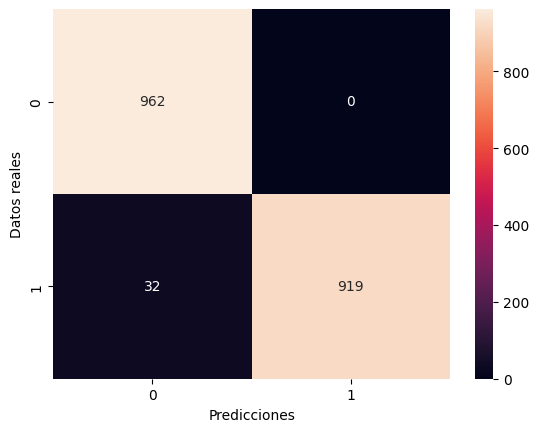

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred_best)

# Mostrar la matriz de confusión en un mapa de calor
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicciones")
plt.ylabel("Datos reales")
plt.show();

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


# Definir los hiperparámetros que deseas ajustar
param_grid = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 500, 1000]
}

# Inicializar el modelo de regresión logística
logistic_regression_model = LogisticRegression(multi_class='multinomial', random_state=42)

# Inicializar GridSearchCV con el modelo y los hiperparámetros
grid_search = GridSearchCV(estimator=logistic_regression_model, param_grid=param_grid, cv=5)

# Ajustar GridSearchCV a los datos
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_

# Crear un nuevo modelo de regresión logística con los mejores hiperparámetros
best_logistic_regression_model = LogisticRegression(**best_params, multi_class='multinomial', random_state=42)

# Entrenar el modelo con los mejores hiperparámetros
best_logistic_regression_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_best = best_logistic_regression_model.predict(X_test)

# Evaluar el rendimiento del modelo
report_best = classification_report(y_test, y_pred_best)

# Imprimir el informe de clasificación
print("Informe de clasificación con mejores hiperparámetros:\n", report_best)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

Informe de clasificación con mejores hiperparámetros:
               precision    recall  f1-score   support

           0       0.75      0.72      0.74       962
           1       0.73      0.76      0.75       951

    accuracy                           0.74      1913
   macro avg       0.74      0.74      0.74      1913
weighted avg       0.74      0.74      0.74      1913



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



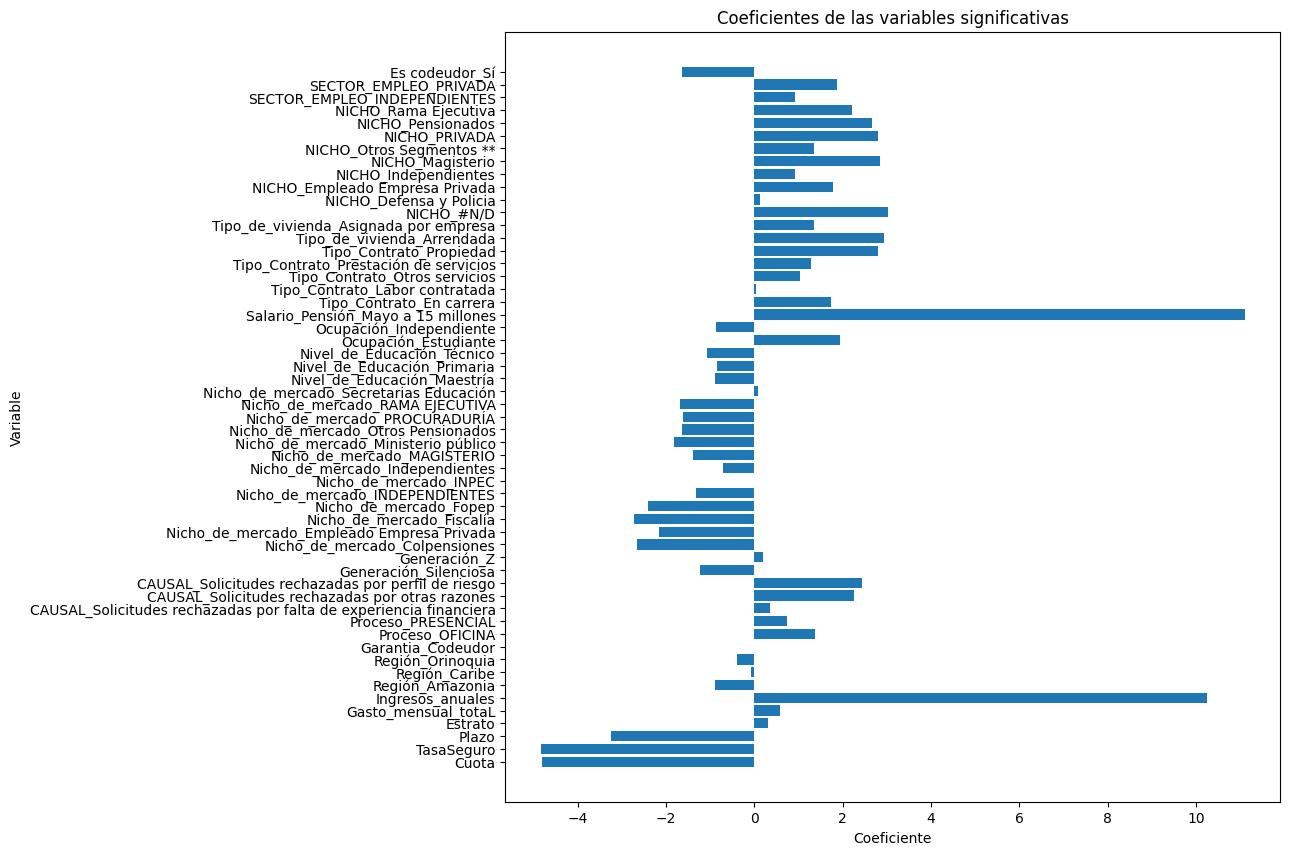

In [ ]:
import matplotlib.pyplot as plt

# Obtener los coeficientes del modelo
coefficients = best_logistic_regression_model.coef_

# Crear un gráfico de barras para visualizar los coeficientes
plt.figure(figsize=(10, 10))
plt.barh(range(len(coefficients[0])), coefficients[0])
plt.yticks(range(len(coefficients[0])), X.columns)
plt.xlabel('Coeficiente')
plt.ylabel('Variable')
plt.title('Coeficientes de las variables significativas')
plt.show()


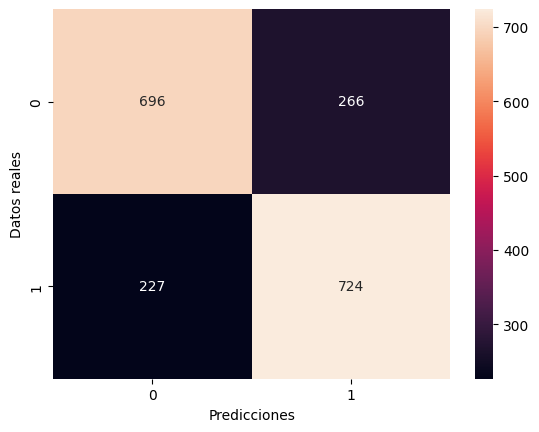

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred_best)

# Mostrar la matriz de confusión en un mapa de calor
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicciones")
plt.ylabel("Datos reales")
plt.show();

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

num_folds = 5  # Número de pliegues (folds) en los que se dividirá el conjunto de datos
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)  # Se inicializa el objeto KFold


# Realiza la validación cruzada
scores = cross_val_score(best_logistic_regression_model, X, y, cv=kf, scoring='accuracy')

# Imprime los resultados de la validación cruzada
print("Precisión para cada fold:", scores)
print("Precisión promedio:", np.mean(scores))
print("Desviación estándar de la precisión:", np.std(scores))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características (opcional para Naive Bayes, pero puede mejorar el rendimiento)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializar y ajustar el modelo de clasificador bayesiano ingenuo gaussiano
model_gaus = GaussianNB()
model_gaus.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred = model_gaus.predict(X_test_scaled)

# Evaluar el modelo
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.54      1.00      0.70       644
           1       1.00      0.14      0.24       631

    accuracy                           0.57      1275
   macro avg       0.77      0.57      0.47      1275
weighted avg       0.77      0.57      0.48      1275



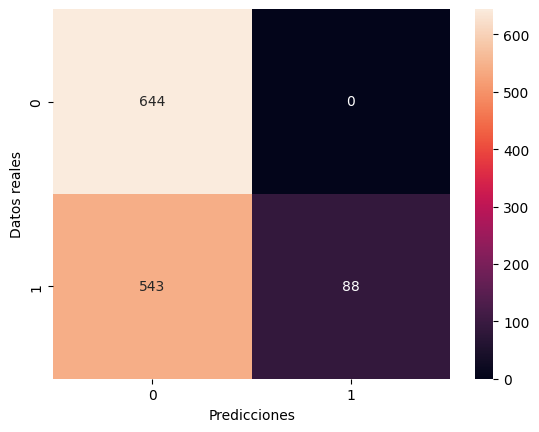

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión en un mapa de calor
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicciones")
plt.ylabel("Datos reales")
plt.show();

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Definir los hiperparámetros que deseas ajustar
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],
    'class_weight': [None, 'balanced']
}

# Inicializar el modelo de SVM
svm_model = SVC()

# Inicializar GridSearchCV con el modelo y los hiperparámetros
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5)

# Ajustar GridSearchCV a los datos
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_

# Crear un nuevo modelo de SVM con los mejores hiperparámetros
best_svm_model = SVC(**best_params)

# Entrenar el modelo con los mejores hiperparámetros
best_svm_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_best = best_svm_model.predict(X_test)

# Evaluar el rendimiento del modelo
report_best = classification_report(y_test, y_pred_best)

# Imprimir el informe de clasificación
print("Informe de clasificación con mejores hiperparámetros:\n", report_best)
print("Mejores hiperparámetros:", best_params)
print("Exactitud del modelo Random Forest con mejores hiperparámetros:", accuracy_best)
print("Informe de clasificación:\n", report_best)



Informe de clasificación con mejores hiperparámetros:
               precision    recall  f1-score   support

           0       0.94      0.74      0.83       962
           1       0.79      0.96      0.86       951

    accuracy                           0.85      1913
   macro avg       0.87      0.85      0.85      1913
weighted avg       0.87      0.85      0.85      1913



In [ ]:
import matplotlib.pyplot as plt

# Obtener los coeficientes de las características (vectores de soporte)
coefficients = best_svm_model.coef_[0]

# Obtener los nombres de las características
feature_names = X.columns

# Ordenar las características y sus coeficientes por importancia
sorted_indices = coefficients.argsort()
sorted_features = feature_names[sorted_indices]
sorted_coefficients = coefficients[sorted_indices]

# Graficar los coeficientes de las características
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_features)), sorted_coefficients, color='skyblue')
plt.yticks(range(len(sorted_features)), sorted_features)
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Coefficients of Features in SVM Model')
plt.grid(True)
plt.tight_layout()
plt.show()


AttributeError: coef_ is only available when using a linear kernel

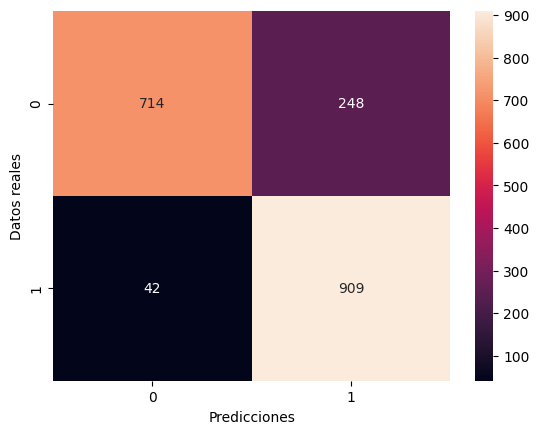

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred_best)

# Mostrar la matriz de confusión en un mapa de calor
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicciones")
plt.ylabel("Datos reales")
plt.show();

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

num_folds = 5  # Número de pliegues (folds) en los que se dividirá el conjunto de datos
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)  # Se inicializa el objeto KFold


# Realiza la validación cruzada
scores = cross_val_score(best_svm_model, X, y, cv=kf, scoring='accuracy')

# Imprime los resultados de la validación cruzada
print("Precisión para cada fold:", scores)
print("Precisión promedio:", np.mean(scores))
print("Desviación estándar de la precisión:", np.std(scores))

Precisión para cada fold: [0.85803922 0.84078431 0.87843137 0.86117647 0.87048666]
Precisión promedio: 0.8617836057499924
Desviación estándar de la precisión: 0.012714169749777576


In [ ]:
## Validacion cruzada

In [ ]:
#Presentacion variables numericas

Jorge Enrique Victorino Guzman
21:44
def df_desc(df):
    dfnum = df.select_dtypes(exclude='object')
    dfcat = df.select_dtypes(include='object')
    print('Dataframe: tamaño', df.shape)
    dfdesc1 = dfnum.dtypes.to_frame('type')
    dfdesc1['nvalues'] = dfnum.nunique()
    dfdesc1['nulos'] = dfnum.shape[0]-dfnum.notna().sum()
    dfdesc1['max'] = dfnum.max()
    dfdesc1['min'] = dfnum.min()
    dfdesc1['mediana'] = dfnum.median()
    dfdesc1 = dfdesc1.reset_index(names='numeric')
    print('--'*20,'Variables Numéricas', '--'*20)
    display(dfdesc1)

In [ ]:

    dfdesc2 = dfcat.dtypes.to_frame('type')
    dfdesc2['nvalues'] = dfcat.nunique()
    dfdesc2['nulos'] = dfcat.shape[0]-dfcat.notna().sum()
    top = []
    freq = []
    for col in dfcat:
        val = dfcat[col].value_counts()
        top.append(val.index[0])
        freq.append(val.values[0])
    dfdesc2['mas_frecuente'] = top
    dfdesc2['frecuencia'] = freq
    dfdesc2 = dfdesc2.reset_index(names='variable')
    print('\n--Variables Categóricas', '--'*40)
    display(dfdesc2)